# Pre-Equilibrium Maximazation of Yield #

In [22]:
# make sure jupyter path is correct for loading local moudules
import sys
# path to steric_simulator module relative to notebook
sys.path.append("../../../")
import copy

In [23]:
from steric_free_simulator import ReactionNetwork, VectorizedRxnNet, VecSim, Optimizer, EquilibriumSolver
import networkx as nx
import torch
from torch import DoubleTensor as Tensor
import numpy as np

We'll start with the AP2 complex that we've worked with before. Pairwise $\Delta Gs$ were derived from the PDB structures via Rossetta

In [3]:
base_input = '../../input_files/ap2.pwr'
rn = ReactionNetwork(base_input, one_step=True)
rn.resolve_tree()
vec_rn = VectorizedRxnNet(rn, dev='cpu')

['default_assoc', 1.0]
['A']
100.0
['M']
100.0
['B']
100.0
['S']
100.0
Parsing rule...
['A(a)+B(b)<->A(a!1).B(a!1)', '', 'G=-20']
['A', 'B', '']
['A(a)+B(b)', 'A(a!1).B(a!1)']
GGGGGGGGGgg
Parsing rule...
['A(b)+M(a)<->A(b!1).M(a!1)', '', 'G=-20']
['A', 'M', '']
['A(b)+M(a)', 'A(b!1).M(a!1)']
GGGGGGGGGgg
Parsing rule...
['A(c)+S(a)<->A(c!1).S(a!1)', '', 'G=-20']
['A', 'S', '']
['A(c)+S(a)', 'A(c!1).S(a!1)']
GGGGGGGGGgg
Parsing rule...
['B(b)+M(b)<->B(b!1).M(b!1)', '', 'G=-20']
['B', 'M', '']
['B(b)+M(b)', 'B(b!1).M(b!1)']
GGGGGGGGGgg
Parsing rule...
['B(c)+S(b)<->M(c!1).S(b!1)', '', 'G=-20']
['B', 'S', '']
['B(c)+S(b)', 'M(c!1).S(b!1)']
GGGGGGGGGgg
Parsing rule...
['M(c)+S(b)<->M(c!1).S(b!1)', '', 'G=-20']
['M', 'S', '']
['M(c)+S(b)', 'M(c!1).S(b!1)']
GGGGGGGGGgg
Node-1 :  (0, {'struct': <networkx.classes.graph.Graph object at 0x7f51a161d898>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})
Node-2 :  (0, {'struct': <networkx.classes.graph.Graph object at 0x7f51a161d898>, 

[(10, {'struct': <networkx.classes.graph.Graph object at 0x7f51a0ddbeb8>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})]
Connected item Edges:  [('S', 'A'), ('S', 'M'), ('A', 'M')]
Adding an new edge-- 3 10
New bonds:  [('A', 'S'), ('M', 'S')]
Adding an new edge-- 4 10
Node-1 :  (3, {'struct': <networkx.classes.graph.Graph object at 0x7f5234501cc0>, 'copies': tensor([100.], dtype=torch.float64), 'subunits': 1})
Node-2 :  (5, {'struct': <networkx.classes.graph.Graph object at 0x7f51a0e38ba8>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
-----
{'S'}
{'A', 'B'}
{'S'}
False
Orig edges:  []
Nextn edges:  [('A', 'B')]
Item edges:  [('A', 'B')]
Allowed edges: 
('A', 'B')
Allowed edges: 
('A', 'M')
Allowed edges: 
('A', 'S')
############################3
Allowed edges: 
('B', 'M')
Allowed edges: 
('B', 'S')
############################3
Allowed edges: 
('M', 'S')
[(12, {'struct': <networkx.classes.graph.Graph object at 0x7f51a0ddb748>, 'copies': tensor([0.], dtyp

Node-2 :  (4, {'struct': <networkx.classes.graph.Graph object at 0x7f5234501e10>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
-----
{'S', 'A'}
{'M', 'A'}
{'S'}
Steric hindrance detected
Node-1 :  (6, {'struct': <networkx.classes.graph.Graph object at 0x7f51a0e38f98>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
Node-2 :  (5, {'struct': <networkx.classes.graph.Graph object at 0x7f51a0e38ba8>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
-----
{'S', 'A'}
{'A', 'B'}
{'S'}
Steric hindrance detected
Node-1 :  (6, {'struct': <networkx.classes.graph.Graph object at 0x7f51a0e38f98>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
Node-2 :  (6, {'struct': <networkx.classes.graph.Graph object at 0x7f51a0e38f98>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2})
-----
{'S', 'A'}
{'S', 'A'}
set()
Steric hindrance detected
Node-1 :  (6, {'struct': <networkx.classes.graph.Graph object at 0x7f51a0e38f98>, 'copies': tensor([0.], 

{'M'}
Steric hindrance detected
Node-1 :  (10, {'struct': <networkx.classes.graph.Graph object at 0x7f51a0ddbeb8>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
Node-2 :  (13, {'struct': <networkx.classes.graph.Graph object at 0x7f51a0ddfba8>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
-----
{'S', 'M', 'A'}
{'S', 'M', 'B'}
{'A'}
Steric hindrance detected
Node-1 :  (10, {'struct': <networkx.classes.graph.Graph object at 0x7f51a0ddbeb8>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 6})
Node-2 :  (14, {'struct': <networkx.classes.graph.Graph object at 0x7f51a1545780>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 21})
-----
{'S', 'M', 'A'}
{'S', 'M', 'B', 'A'}
set()
Steric hindrance detected
Trying internal bonds
Allowed edges: 
('A', 'B')
Allowed edges: 
('A', 'M')
*********************************************
Adding extra new bonds for the repeating unit - 
[('M', 'A'), ('M', 'S'), ('A', 'S')]
False
Allowed edges: 
('A', 'S')
*****

tensor([[-1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0., -1., -1., -1.,  0.,  0., -1.,  1.,  1.,  1.,
         -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
         -0., -0.,  1.,  1.,  1., -0., -0.,  1.],
        [-1.,  0.,  0., -1., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.,  1., -0., -0.,
          1.,  1.,  1.,  1., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
         -0., -0., -0., -0., -0.,  1.,  1., -0.],
        [ 0., -1.,  0., -1.,  0.,  0.,  0., -1., -1., -1., -1., -1.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  1., -0.,
          1., -0., -0., -0.,  1.,  1.,  1.,  1.,  1., -0., -0., -0., -0., -0.,
         -0., -0., -0., -0., -0., -0., -0., -0.],
        [ 0.,  0., -1.,  0., -1.,  0.,  0., -1.,  0.,  0.,  0.,  0., -1., -1.,
         -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  

In [27]:
print(rn.rxn_class)
rids = np.array(sum(list(rn.rxn_class.values()),[]))
order = np.argsort(rids)
print(rids[order])

a = Tensor([4,5,6])
c = Tensor([1,2,3])

print(a/c)
b = [a,c]
d = torch.Tensor(sum([n.tolist() for n in b],[]))
print(torch.mean(d).item())
print(torch.prod(d))

a = [1,2,3,4,5]
b = Tensor(a)
print(b)

{1: [0, 1, 2, 3, 4, 7], 2: [5, 6, 8, 9, 10, 12, 13, 14, 19, 20, 21, 22], 3: [11, 15, 23, 24], 4: [16, 17, 18]}
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
tensor([4.0000, 2.5000, 2.0000], dtype=torch.float64)
3.5
tensor(720.)
tensor([1., 2., 3., 4., 5.], dtype=torch.float64)


In [5]:
uid_dict = {}
sys.path.append("../../")
import numpy as np
from reaction_network import gtostr
for n in rn.network.nodes():
    #print(n)
    #print(rn.network.nodes()[n])
    for k,v in rn.network[n].items():
        uid = v['uid']
        r1 = set(gtostr(rn.network.nodes[n]['struct']))
        p = set(gtostr(rn.network.nodes[k]['struct']))
        r2 = p-r1
        reactants = (r1,r2)
        uid_dict[(n,k)] = uid

print(uid_dict)

{(0, 4): 0, (0, 5): 1, (0, 6): 2, (0, 9): 19, (0, 10): 20, (0, 12): 21, (0, 14): 24, (1, 4): 0, (1, 7): 3, (1, 8): 4, (1, 9): 5, (1, 10): 6, (1, 13): 22, (1, 14): 23, (2, 5): 1, (2, 7): 3, (2, 11): 7, (2, 9): 8, (2, 12): 9, (2, 13): 10, (2, 14): 11, (3, 6): 2, (3, 8): 4, (3, 11): 7, (3, 10): 12, (3, 12): 13, (3, 13): 14, (3, 14): 15, (4, 9): 8, (4, 10): 12, (4, 14): 16, (5, 9): 5, (5, 12): 13, (5, 14): 17, (6, 10): 6, (6, 12): 9, (6, 14): 18, (7, 13): 14, (7, 14): 18, (7, 9): 19, (8, 13): 10, (8, 14): 17, (8, 10): 20, (9, 14): 15, (10, 14): 11, (11, 14): 16, (11, 12): 21, (11, 13): 22, (12, 14): 23, (13, 14): 24}


In [6]:
#Do modifications here
#Changing Initial Conditions
import networkx as nx
#Changin k_on
new_kon = torch.zeros([rn._rxn_count], requires_grad=True).double()
new_kon = new_kon + Tensor([1.]*np.array(1e0))
update_kon_dict = {}
for edge in rn.network.edges:
    print(rn.network.get_edge_data(edge[0],edge[1]))
    update_kon_dict[edge] = new_kon[uid_dict[edge]]

nx.set_edge_attributes(rn.network,update_kon_dict,'k_on')
optim_rates = [0,1,2,3,4,7]
# for edge in rn.network.edges:
#     print(rn.network.get_edge_data(edge[0],edge[1]))
# vec_rn = VectorizedRxnNet(rn, dev='cpu')
vec_rn = VectorizedRxnNet(rn, dev='cpu',assoc_is_param=False,dissoc_is_param=True)
print(vec_rn.kon)

#Changing initial concentrations

{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 0}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 1}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 2}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 19}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 20}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-40.], dtype=torch.float64), 'uid': 21}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-60.], dtype=torch.float64), 'uid': 24}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 0}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 3}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-20.], dtype=torch.float64), 'uid': 4}
{'k_on

In [ ]:
print(vec_rn.rxn_score_vec)

## The Equilibrium Solution ##
First we will find the equilibrium solution for this system.

In [8]:
# vec_rn.update_reaction_net(rn)
# # poly_system = EquilibriumSolver(rn)
# solution = poly_system.solve()
# print(solution)
# if solution == None:
#     print("No Equilibrium solution")
# else:
#     print(solution)
#     print("Equilibrium expected yield: ", 100 * solution[-1] / min(vec_rn.initial_copies[:vec_rn.num_monomers]), '%')
# print(vec_rn.kon)

In [9]:
# uid_dict = {}
# sys.path.append("../")
# import numpy as np
# from reaction_network import gtostr
# from torch import DoubleTensor as Tensor

# def get_max_edge(n):
#     """
#     Calculates the max rate (k_on) for a given node
#     To find out the maximum flow path to the final complex starting from the current node.
    
#     Can also calculate the total rate of consumption of a node by summing up all rates. 
#     Can tell which component is used quickly.
#     """
#     try:
#         edges = rn.network.out_edges(n)
#         #Loop over all edges
#         #Get attributes
#         if len(edges)==0:
#             return(False)
#         kon_max = -1
#         next_node = -1
        
#         kon_sum = 0
#         for edge in edges:
#             data = rn.network.get_edge_data(edge[0],edge[1])
#             #print(data)
#             #Get uid
#             uid = data['uid']
#             #Get updated kon
#             temp_kon = vec_rn.kon[uid]
#             kon_sum+=temp_kon
            
# #             #Calculate k_off also
# #             std_c = Tensor([1.])
# #             l_kon = torch.log(temp_kon)
# #             l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (self._R * self._T)) + l_kon + torch.log(std_c)
#             if temp_kon > kon_max:
#                 kon_max = temp_kon
#                 next_node=edge[1]
#         return(kon_max,next_node,kon_sum)
#     except Exception as err:
#         raise(err)

# pathway = []
# kon_sumarray = []
# total_con_rate = {}
# for n in rn.network.nodes():
    
#     n_str = gtostr(rn.network.nodes[n]['struct']) 
    
#     paths = [n_str]
#     kon_sum = 0
#     temp_node = n
#     max_edge = True
#     consumption_rate = 0
#     if n < len(rn.network.nodes()):#num_monomers:
# #         print("Current node: ")
# #         print(n_str)
#         while max_edge:
#             max_edge = get_max_edge(temp_node)
#             if max_edge:
#                 total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
#                 temp_node = max_edge[1]
#                 kon_sum += max_edge[0].item()
                
# #                 print("Next node: ")
# #                 print(temp_node)

#                 paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
#             else:
#                 break
#         pathway.append(paths)
#         kon_sumarray.append(kon_sum)
#         paths=[]

# print(pathway)
# print(kon_sumarray)
# #print(total_con_rate)

In [10]:
# if solution != None:
#     for k,v in sorted(total_con_rate.items(),key=lambda x : x[1]):
#         print(k," : ", v.item())

In [11]:
# if solution !=None:
#     for k,v in sorted(net_flux.items(),key=lambda x : x[1]):
#         print(k," : ", v)

## Using the optimizer with a 1 second simulation runtime ##

In [12]:
vec_rn.reset(reset_params=True)
optim = Optimizer(reaction_network=vec_rn,
                  sim_runtime=1,
                  optim_iterations=5000,
                  learning_rate=[1e-4,1e-14],
                  device='cpu',method="RMSprop",lr_change_step=200)
optim.rn.update_reaction_net(rn)
optim.optimize()

Using CPU
[Parameter containing:
tensor([0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021], dtype=torch.float64,
       requires_grad=True), Parameter containing:
tensor([4.2484e-12, 4.2484e-12, 4.2484e-12, 4.2484e-12, 4.2484e-12, 4.2484e-12,
        4.2484e-12, 4.2484e-12, 4.2484e-12, 4.2484e-12, 4.2484e-12, 4.2484e-12],
       dtype=torch.float64, requires_grad=True), Parameter containing:
tensor([8.7565e-21, 8.7565e-21, 8.7565e-21, 8.7565e-21], dtype=torch.float64,
       requires_grad=True), Parameter containing:
tensor([1.8049e-29, 1.8049e-29, 1.8049e-29], dtype=torch.float64,
       requires_grad=True)]
#####
Parameter containing:
tensor([0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021], dtype=torch.float64,
       requires_grad=True)
#####
Parameter containing:
tensor([4.2484e-12, 4.2484e-12, 4.2484e-12, 4.2484e-12, 4.2484e-12, 4.2484e-12,
        4.2484e-12, 4.2484e-12, 4.2484e-12, 4.2484e-12, 4.2484e-12, 4.2484e-12],
       dtype=torch.float64, requires_grad=True)
#####
Parameter

Next time:  tensor(1.2873, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 7 was 54.9%
Current On rates:  tensor([2.7640, 2.7640, 2.7640, 2.7862, 2.7862, 2.6430, 2.6430, 2.7862, 2.6430,
        2.6430, 2.6365, 2.7970, 2.6430, 2.6430, 2.6365, 2.7970, 2.7744, 2.7744,
        2.7744, 2.6487, 2.6487, 2.6487, 2.6365, 2.7970, 2.7907],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021], dtype=torch.float64), tensor([4.1177e-12, 4.1177e-12, 4.1177e-12, 4.1177e-12, 4.1062e-12, 4.1177e-12,
        4.1177e-12, 4.1062e-12, 4.1278e-12, 4.1278e-12, 4.1278e-12, 4.1062e-12],
       dtype=torch.float64), tensor([9.0298e-21, 9.0298e-21, 9.0298e-21, 9.0199e-21], dtype=torch.float64), tensor([1.8447e-29, 1.8447e-29, 1.8447e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2624, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than

Next time:  tensor(1.0906, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 17 was 55.6%
Current On rates:  tensor([2.8003, 2.8003, 2.8003, 2.8518, 2.8518, 2.5800, 2.5800, 2.8518, 2.5800,
        2.5800, 2.5696, 2.8635, 2.5800, 2.5800, 2.5696, 2.8635, 2.8195, 2.8195,
        2.8195, 2.5897, 2.5897, 2.5897, 2.5696, 2.8635, 2.8767],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0021, 0.0021, 0.0021, 0.0022, 0.0022, 0.0022], dtype=torch.float64), tensor([4.0173e-12, 4.0173e-12, 4.0173e-12, 4.0173e-12, 3.9997e-12, 4.0173e-12,
        4.0173e-12, 3.9997e-12, 4.0337e-12, 4.0337e-12, 4.0337e-12, 3.9997e-12],
       dtype=torch.float64), tensor([9.2302e-21, 9.2302e-21, 9.2302e-21, 9.2741e-21], dtype=torch.float64), tensor([1.8736e-29, 1.8736e-29, 1.8736e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.0755, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger tha

Next time:  tensor(1.5615, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 27 was 57.1%
Current On rates:  tensor([2.8441, 2.8441, 2.8441, 2.9160, 2.9160, 2.5279, 2.5279, 2.9160, 2.5279,
        2.5279, 2.5160, 2.9186, 2.5279, 2.5279, 2.5160, 2.9186, 2.8622, 2.8622,
        2.8622, 2.5394, 2.5394, 2.5394, 2.5160, 2.9186, 2.9410],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0022, 0.0022, 0.0022, 0.0022, 0.0022, 0.0022], dtype=torch.float64), tensor([3.9319e-12, 3.9319e-12, 3.9319e-12, 3.9319e-12, 3.9116e-12, 3.9319e-12,
        3.9319e-12, 3.9116e-12, 3.9514e-12, 3.9514e-12, 3.9514e-12, 3.9116e-12],
       dtype=torch.float64), tensor([9.3944e-21, 9.3944e-21, 9.3944e-21, 9.4632e-21], dtype=torch.float64), tensor([1.9006e-29, 1.9006e-29, 1.9006e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.5364, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger tha

Next time:  tensor(1.3452, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 37 was 57.6%
Current On rates:  tensor([2.8926, 2.8926, 2.8926, 2.9793, 2.9793, 2.4823, 2.4823, 2.9793, 2.4823,
        2.4823, 2.4698, 2.9674, 2.4823, 2.4823, 2.4698, 2.9674, 2.9031, 2.9031,
        2.9031, 2.4947, 2.4947, 2.4947, 2.4698, 2.9674, 2.9956],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0022, 0.0022, 0.0022, 0.0023, 0.0023, 0.0023], dtype=torch.float64), tensor([3.8552e-12, 3.8552e-12, 3.8552e-12, 3.8552e-12, 3.8336e-12, 3.8552e-12,
        3.8552e-12, 3.8336e-12, 3.8764e-12, 3.8764e-12, 3.8764e-12, 3.8336e-12],
       dtype=torch.float64), tensor([9.5379e-21, 9.5379e-21, 9.5379e-21, 9.6221e-21], dtype=torch.float64), tensor([1.9260e-29, 1.9260e-29, 1.9260e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3272, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger tha

Next time:  tensor(1.1863, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 47 was 58.0%
Current On rates:  tensor([2.9438, 2.9438, 2.9438, 3.0418, 3.0418, 2.4410, 2.4410, 3.0418, 2.4410,
        2.4410, 2.4282, 3.0121, 2.4410, 2.4410, 2.4282, 3.0121, 2.9425, 2.9425,
        2.9425, 2.4538, 2.4538, 2.4538, 2.4282, 3.0121, 3.0446],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0022, 0.0022, 0.0022, 0.0023, 0.0023, 0.0023], dtype=torch.float64), tensor([3.7844e-12, 3.7844e-12, 3.7844e-12, 3.7844e-12, 3.7620e-12, 3.7844e-12,
        3.7844e-12, 3.7620e-12, 3.8067e-12, 3.8067e-12, 3.8067e-12, 3.7620e-12],
       dtype=torch.float64), tensor([9.6676e-21, 9.6676e-21, 9.6676e-21, 9.7626e-21], dtype=torch.float64), tensor([1.9503e-29, 1.9503e-29, 1.9503e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.1727, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger tha

Next time:  tensor(1.0637, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 57 was 58.5%
Current On rates:  tensor([2.9960, 2.9960, 2.9960, 3.1031, 3.1031, 2.4029, 2.4029, 3.1031, 2.4029,
        2.4029, 2.3899, 3.0539, 2.4029, 2.4029, 2.3899, 3.0539, 2.9809, 2.9809,
        2.9809, 2.4158, 2.4158, 2.4158, 2.3899, 3.0539, 3.0898],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0023, 0.0023, 0.0023, 0.0023, 0.0023, 0.0023], dtype=torch.float64), tensor([3.7179e-12, 3.7179e-12, 3.7179e-12, 3.7179e-12, 3.6949e-12, 3.7179e-12,
        3.7179e-12, 3.6949e-12, 3.7407e-12, 3.7407e-12, 3.7407e-12, 3.6949e-12],
       dtype=torch.float64), tensor([9.7876e-21, 9.7876e-21, 9.7876e-21, 9.8906e-21], dtype=torch.float64), tensor([1.9736e-29, 1.9736e-29, 1.9736e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.0529, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger tha

Next time:  tensor(1.5991, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 67 was 59.9%
Current On rates:  tensor([3.0482, 3.0482, 3.0482, 3.1626, 3.1626, 2.3671, 2.3671, 3.1626, 2.3671,
        2.3671, 2.3542, 3.0936, 2.3671, 2.3671, 2.3542, 3.0936, 3.0185, 3.0185,
        3.0185, 2.3801, 2.3801, 2.3801, 2.3542, 3.0936, 3.1323],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0023, 0.0023, 0.0023, 0.0024, 0.0024, 0.0024], dtype=torch.float64), tensor([3.6544e-12, 3.6544e-12, 3.6544e-12, 3.6544e-12, 3.6312e-12, 3.6544e-12,
        3.6544e-12, 3.6312e-12, 3.6777e-12, 3.6777e-12, 3.6777e-12, 3.6312e-12],
       dtype=torch.float64), tensor([9.9001e-21, 9.9001e-21, 9.9001e-21, 1.0009e-20], dtype=torch.float64), tensor([1.9961e-29, 1.9961e-29, 1.9961e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.5774, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger tha

Next time:  tensor(1.4062, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 77 was 60.3%
Current On rates:  tensor([3.0997, 3.0997, 3.0997, 3.2202, 3.2202, 2.3332, 2.3332, 3.2202, 2.3332,
        2.3332, 2.3204, 3.1318, 2.3332, 2.3332, 2.3204, 3.1318, 3.0555, 3.0555,
        3.0555, 2.3462, 2.3462, 2.3462, 2.3204, 3.1318, 3.1728],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0023, 0.0023, 0.0023, 0.0024, 0.0024, 0.0024], dtype=torch.float64), tensor([3.5934e-12, 3.5934e-12, 3.5934e-12, 3.5934e-12, 3.5700e-12, 3.5934e-12,
        3.5934e-12, 3.5700e-12, 3.6170e-12, 3.6170e-12, 3.6170e-12, 3.5700e-12],
       dtype=torch.float64), tensor([1.0007e-20, 1.0007e-20, 1.0007e-20, 1.0121e-20], dtype=torch.float64), tensor([2.0181e-29, 2.0181e-29, 2.0181e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3894, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger tha

Next time:  tensor(1.2548, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 87 was 60.6%
Current On rates:  tensor([3.1504, 3.1504, 3.1504, 3.2764, 3.2764, 2.3010, 2.3010, 3.2764, 2.3010,
        2.3010, 2.2883, 3.1687, 2.3010, 2.3010, 2.2883, 3.1687, 3.0919, 3.0919,
        3.0919, 2.3139, 2.3139, 2.3139, 2.2883, 3.1687, 3.2118],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0024, 0.0024, 0.0024, 0.0024, 0.0024, 0.0024], dtype=torch.float64), tensor([3.5344e-12, 3.5344e-12, 3.5344e-12, 3.5344e-12, 3.5109e-12, 3.5344e-12,
        3.5344e-12, 3.5109e-12, 3.5582e-12, 3.5582e-12, 3.5582e-12, 3.5109e-12],
       dtype=torch.float64), tensor([1.0109e-20, 1.0109e-20, 1.0109e-20, 1.0228e-20], dtype=torch.float64), tensor([2.0394e-29, 2.0394e-29, 2.0394e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2414, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger tha

Next time:  tensor(1.1327, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 97 was 61.0%
Current On rates:  tensor([3.2003, 3.2003, 3.2003, 3.3312, 3.3312, 2.2700, 2.2700, 3.3312, 2.2700,
        2.2700, 2.2574, 3.2045, 2.2700, 2.2700, 2.2574, 3.2045, 3.1280, 3.1280,
        3.1280, 2.2828, 2.2828, 2.2828, 2.2574, 3.2045, 3.2495],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0024, 0.0024, 0.0024, 0.0025, 0.0025, 0.0025], dtype=torch.float64), tensor([3.4771e-12, 3.4771e-12, 3.4771e-12, 3.4771e-12, 3.4535e-12, 3.4771e-12,
        3.4771e-12, 3.4535e-12, 3.5010e-12, 3.5010e-12, 3.5010e-12, 3.4535e-12],
       dtype=torch.float64), tensor([1.0207e-20, 1.0207e-20, 1.0207e-20, 1.0330e-20], dtype=torch.float64), tensor([2.0603e-29, 2.0603e-29, 2.0603e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.1218, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger tha

Next time:  tensor(1.0413, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 106 was 61.4%
Current On rates:  tensor([3.2444, 3.2444, 3.2444, 3.3793, 3.3793, 2.2432, 2.2432, 3.3793, 2.2432,
        2.2432, 2.2307, 3.2362, 2.2432, 2.2432, 2.2307, 3.2362, 3.1603, 3.1603,
        3.1603, 2.2558, 2.2558, 2.2558, 2.2307, 3.2362, 3.2827],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0024, 0.0024, 0.0024, 0.0025, 0.0025, 0.0025], dtype=torch.float64), tensor([3.4266e-12, 3.4266e-12, 3.4266e-12, 3.4266e-12, 3.4030e-12, 3.4266e-12,
        3.4266e-12, 3.4030e-12, 3.4506e-12, 3.4506e-12, 3.4506e-12, 3.4030e-12],
       dtype=torch.float64), tensor([1.0293e-20, 1.0293e-20, 1.0293e-20, 1.0418e-20], dtype=torch.float64), tensor([2.0788e-29, 2.0788e-29, 2.0788e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.0320, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.6031, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 116 was 62.7%
Current On rates:  tensor([3.2926, 3.2926, 3.2926, 3.4315, 3.4315, 2.2143, 2.2143, 3.4315, 2.2143,
        2.2143, 2.2020, 3.2707, 2.2143, 2.2143, 2.2020, 3.2707, 3.1959, 3.1959,
        3.1959, 2.2268, 2.2268, 2.2268, 2.2020, 3.2707, 3.3187],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025], dtype=torch.float64), tensor([3.3716e-12, 3.3716e-12, 3.3716e-12, 3.3716e-12, 3.3480e-12, 3.3716e-12,
        3.3716e-12, 3.3480e-12, 3.3956e-12, 3.3956e-12, 3.3956e-12, 3.3480e-12],
       dtype=torch.float64), tensor([1.0386e-20, 1.0386e-20, 1.0386e-20, 1.0514e-20], dtype=torch.float64), tensor([2.0990e-29, 2.0990e-29, 2.0990e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.5829, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.4215, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 126 was 63.1%
Current On rates:  tensor([3.3401, 3.3401, 3.3401, 3.4825, 3.4825, 2.1862, 2.1862, 3.4825, 2.1862,
        2.1862, 2.1741, 3.3047, 2.1862, 2.1862, 2.1741, 3.3047, 3.2314, 3.2314,
        3.2314, 2.1986, 2.1986, 2.1986, 2.1741, 3.3047, 3.3542],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0025, 0.0025, 0.0025, 0.0026, 0.0026, 0.0026], dtype=torch.float64), tensor([3.3176e-12, 3.3176e-12, 3.3176e-12, 3.3176e-12, 3.2940e-12, 3.3176e-12,
        3.3176e-12, 3.2940e-12, 3.3417e-12, 3.3417e-12, 3.3417e-12, 3.2940e-12],
       dtype=torch.float64), tensor([1.0476e-20, 1.0476e-20, 1.0476e-20, 1.0606e-20], dtype=torch.float64), tensor([2.1189e-29, 2.1189e-29, 2.1189e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4055, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.3756, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 136 was 63.2%
Current On rates:  tensor([3.3874, 3.3619, 3.3871, 3.4996, 3.5283, 2.1787, 2.1734, 3.4986, 2.1724,
        2.1722, 2.1612, 3.3226, 2.1736, 2.1787, 2.1678, 3.3361, 3.2040, 3.2040,
        3.2040, 2.1927, 2.1876, 2.1925, 2.1676, 3.3350, 3.3894],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0025, 0.0025, 0.0025, 0.0026, 0.0026, 0.0026], dtype=torch.float64), tensor([3.3032e-12, 3.2929e-12, 3.2907e-12, 3.2902e-12, 3.2689e-12, 3.2933e-12,
        3.3033e-12, 3.2822e-12, 3.3307e-12, 3.3207e-12, 3.3303e-12, 3.2817e-12],
       dtype=torch.float64), tensor([1.0523e-20, 1.0558e-20, 1.0555e-20, 1.0697e-20], dtype=torch.float64), tensor([2.1028e-29, 2.1028e-29, 2.1028e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3624, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.3048, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 146 was 63.4%
Current On rates:  tensor([3.4097, 3.4257, 3.4095, 3.5418, 3.5223, 2.1565, 2.1605, 3.5409, 2.1615,
        2.1612, 2.1560, 3.3662, 2.1608, 2.1566, 2.1514, 3.3582, 3.1891, 3.1891,
        3.1891, 2.1772, 2.1811, 2.1769, 2.1511, 3.3572, 3.4225],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0025, 0.0025, 0.0025, 0.0026, 0.0026, 0.0026], dtype=torch.float64), tensor([3.2708e-12, 3.2787e-12, 3.2703e-12, 3.2783e-12, 3.2599e-12, 3.2689e-12,
        3.2693e-12, 3.2507e-12, 3.3014e-12, 3.3089e-12, 3.3090e-12, 3.2604e-12],
       dtype=torch.float64), tensor([1.0631e-20, 1.0610e-20, 1.0630e-20, 1.0776e-20], dtype=torch.float64), tensor([2.0890e-29, 2.0890e-29, 2.0890e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3149, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.2515, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 156 was 63.5%
Current On rates:  tensor([3.4397, 3.4524, 3.4536, 3.5647, 3.5652, 2.1438, 2.1437, 3.5788, 2.1480,
        2.1442, 2.1410, 3.3955, 2.1479, 2.1443, 2.1410, 3.3945, 3.1679, 3.1679,
        3.1679, 2.1658, 2.1657, 2.1622, 2.1368, 3.3895, 3.4545],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026], dtype=torch.float64), tensor([3.2407e-12, 3.2404e-12, 3.2409e-12, 3.2406e-12, 3.2278e-12, 3.2407e-12,
        3.2408e-12, 3.2278e-12, 3.2766e-12, 3.2765e-12, 3.2763e-12, 3.2275e-12],
       dtype=torch.float64), tensor([1.0712e-20, 1.0709e-20, 1.0708e-20, 1.0862e-20], dtype=torch.float64), tensor([2.0791e-29, 2.0791e-29, 2.0791e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2489, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.1728, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 166 was 63.8%
Current On rates:  tensor([3.4940, 3.4924, 3.4934, 3.5868, 3.5871, 2.1197, 2.1196, 3.5853, 2.1199,
        2.1197, 2.1217, 3.4256, 2.1198, 2.1198, 2.1217, 3.4248, 3.1701, 3.1701,
        3.1701, 2.1470, 2.1470, 2.1468, 2.1215, 3.4243, 3.4918],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026], dtype=torch.float64), tensor([3.1867e-12, 3.1866e-12, 3.1872e-12, 3.1867e-12, 3.1909e-12, 3.1871e-12,
        3.1869e-12, 3.1909e-12, 3.2414e-12, 3.2413e-12, 3.2410e-12, 3.1905e-12],
       dtype=torch.float64), tensor([1.0790e-20, 1.0787e-20, 1.0786e-20, 1.0957e-20], dtype=torch.float64), tensor([2.0834e-29, 2.0834e-29, 2.0834e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.1637, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.0874, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 176 was 64.1%
Current On rates:  tensor([3.5194, 3.5179, 3.5189, 3.6115, 3.6117, 2.0952, 2.0952, 3.6100, 2.0956,
        2.0953, 2.0977, 3.4565, 2.0955, 2.0953, 2.0977, 3.4558, 3.1891, 3.1891,
        3.1891, 2.1235, 2.1235, 2.1232, 2.0974, 3.4554, 3.5217],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0026, 0.0026, 0.0026, 0.0026, 0.0026, 0.0026], dtype=torch.float64), tensor([3.1373e-12, 3.1373e-12, 3.1381e-12, 3.1375e-12, 3.1426e-12, 3.1379e-12,
        3.1376e-12, 3.1425e-12, 3.1946e-12, 3.1946e-12, 3.1940e-12, 3.1419e-12],
       dtype=torch.float64), tensor([1.0868e-20, 1.0866e-20, 1.0865e-20, 1.1031e-20], dtype=torch.float64), tensor([2.0943e-29, 2.0943e-29, 2.0943e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.0795, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.0121, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 186 was 64.4%
Current On rates:  tensor([3.5457, 3.5444, 3.5453, 3.6369, 3.6370, 2.0711, 2.0711, 3.6355, 2.0716,
        2.0712, 2.0740, 3.4875, 2.0715, 2.0712, 2.0740, 3.4869, 3.2089, 3.2089,
        3.2089, 2.1002, 2.1003, 2.0999, 2.0736, 3.4866, 3.5517],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0026, 0.0026, 0.0026, 0.0027, 0.0027, 0.0027], dtype=torch.float64), tensor([3.0882e-12, 3.0883e-12, 3.0892e-12, 3.0885e-12, 3.0943e-12, 3.0891e-12,
        3.0885e-12, 3.0942e-12, 3.1478e-12, 3.1479e-12, 3.1472e-12, 3.0935e-12],
       dtype=torch.float64), tensor([1.0946e-20, 1.0945e-20, 1.0944e-20, 1.1106e-20], dtype=torch.float64), tensor([2.1055e-29, 2.1055e-29, 2.1055e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.0050, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.5687, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 196 was 65.7%
Current On rates:  tensor([3.5728, 3.5716, 3.5724, 3.6630, 3.6630, 2.0474, 2.0474, 3.6617, 2.0479,
        2.0475, 2.0507, 3.5186, 2.0478, 2.0475, 2.0506, 3.5181, 3.2294, 3.2294,
        3.2294, 2.0772, 2.0773, 2.0769, 2.0502, 3.5179, 3.5820],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0026, 0.0026, 0.0026, 0.0027, 0.0027, 0.0027], dtype=torch.float64), tensor([3.0393e-12, 3.0394e-12, 3.0405e-12, 3.0397e-12, 3.0462e-12, 3.0403e-12,
        3.0396e-12, 3.0460e-12, 3.1010e-12, 3.1011e-12, 3.1002e-12, 3.0452e-12],
       dtype=torch.float64), tensor([1.1024e-20, 1.1023e-20, 1.1022e-20, 1.1180e-20], dtype=torch.float64), tensor([2.1170e-29, 2.1170e-29, 2.1170e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.5527, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.5426, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 205 was 65.8%
Current On rates:  tensor([3.5835, 3.5597, 3.5845, 3.6756, 3.7043, 2.0495, 2.0428, 3.6755, 2.0431,
        2.0421, 2.0381, 3.5300, 2.0439, 2.0498, 2.0464, 3.5511, 3.2089, 3.2089,
        3.2089, 2.0724, 2.0652, 2.0714, 2.0453, 3.5473, 3.5932],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0026, 0.0026, 0.0026, 0.0027, 0.0027, 0.0027], dtype=torch.float64), tensor([3.0445e-12, 3.0304e-12, 3.0309e-12, 3.0287e-12, 3.0200e-12, 3.0328e-12,
        3.0452e-12, 3.0380e-12, 3.0915e-12, 3.0763e-12, 3.0893e-12, 3.0355e-12],
       dtype=torch.float64), tensor([1.1052e-20, 1.1104e-20, 1.1095e-20, 1.1207e-20], dtype=torch.float64), tensor([2.1052e-29, 2.1052e-29, 2.1052e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4813, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.5357, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 215 was 65.8%
Current On rates:  tensor([3.5826, 3.5788, 3.5632, 3.7239, 3.7045, 2.0454, 2.0495, 3.7006, 2.0451,
        2.0495, 2.0398, 3.5738, 2.0446, 2.0452, 2.0350, 3.5594, 3.1825, 3.1826,
        3.1826, 2.0611, 2.0656, 2.0659, 2.0402, 3.5742, 3.6026],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0026, 0.0026, 0.0026, 0.0027, 0.0027, 0.0027], dtype=torch.float64), tensor([3.0363e-12, 3.0449e-12, 3.0356e-12, 3.0448e-12, 3.0244e-12, 3.0345e-12,
        3.0357e-12, 3.0141e-12, 3.0684e-12, 3.0777e-12, 3.0783e-12, 3.0252e-12],
       dtype=torch.float64), tensor([1.1159e-20, 1.1124e-20, 1.1160e-20, 1.1230e-20], dtype=torch.float64), tensor([2.0902e-29, 2.0902e-29, 2.0902e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.5233, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.4912, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 225 was 65.9%
Current On rates:  tensor([3.5955, 3.5916, 3.5956, 3.7142, 3.7179, 2.0384, 2.0373, 3.7139, 2.0380,
        2.0372, 2.0320, 3.5878, 2.0381, 2.0387, 2.0336, 3.5907, 3.1705, 3.1705,
        3.1706, 2.0598, 2.0584, 2.0587, 2.0325, 3.5881, 3.6375],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0026, 0.0026, 0.0026, 0.0027, 0.0027, 0.0027], dtype=torch.float64), tensor([3.0218e-12, 3.0193e-12, 3.0210e-12, 3.0193e-12, 3.0083e-12, 3.0212e-12,
        3.0225e-12, 3.0117e-12, 3.0660e-12, 3.0632e-12, 3.0638e-12, 3.0092e-12],
       dtype=torch.float64), tensor([1.1193e-20, 1.1200e-20, 1.1194e-20, 1.1314e-20], dtype=torch.float64), tensor([2.0833e-29, 2.0833e-29, 2.0833e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4800, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.4573, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 235 was 66.0%
Current On rates:  tensor([3.6010, 3.5976, 3.6005, 3.7385, 3.7410, 2.0346, 2.0338, 3.7379, 2.0344,
        2.0338, 2.0237, 3.6151, 2.0345, 2.0349, 2.0249, 3.6168, 3.1558, 3.1558,
        3.1558, 2.0506, 2.0495, 2.0496, 2.0239, 3.6151, 3.6526],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0026, 0.0026, 0.0026, 0.0027, 0.0027, 0.0027], dtype=torch.float64), tensor([3.0139e-12, 3.0122e-12, 3.0136e-12, 3.0122e-12, 2.9909e-12, 3.0137e-12,
        3.0147e-12, 2.9936e-12, 3.0470e-12, 3.0447e-12, 3.0450e-12, 2.9913e-12],
       dtype=torch.float64), tensor([1.1260e-20, 1.1264e-20, 1.1260e-20, 1.1351e-20], dtype=torch.float64), tensor([2.0748e-29, 2.0749e-29, 2.0749e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4220, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.4296, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 245 was 66.1%
Current On rates:  tensor([3.6160, 3.6135, 3.6155, 3.7522, 3.7535, 2.0291, 2.0285, 3.7515, 2.0293,
        2.0286, 2.0192, 3.6394, 2.0293, 2.0294, 2.0200, 3.6397, 3.1380, 3.1380,
        3.1380, 2.0456, 2.0448, 2.0446, 2.0189, 3.6383, 3.6800],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0027, 0.0026, 0.0027, 0.0027, 0.0027, 0.0027], dtype=torch.float64), tensor([3.0024e-12, 3.0012e-12, 3.0029e-12, 3.0014e-12, 2.9815e-12, 3.0028e-12,
        3.0032e-12, 2.9833e-12, 3.0367e-12, 3.0350e-12, 3.0345e-12, 2.9810e-12],
       dtype=torch.float64), tensor([1.1318e-20, 1.1319e-20, 1.1316e-20, 1.1416e-20], dtype=torch.float64), tensor([2.0646e-29, 2.0646e-29, 2.0646e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4003, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.4020, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 255 was 66.2%
Current On rates:  tensor([3.6400, 3.6372, 3.6394, 3.7591, 3.7603, 2.0217, 2.0211, 3.7580, 2.0219,
        2.0211, 2.0164, 3.6619, 2.0218, 2.0221, 2.0173, 3.6623, 3.1186, 3.1186,
        3.1186, 2.0428, 2.0419, 2.0417, 2.0163, 3.6612, 3.7148],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0027, 0.0027, 0.0027, 0.0027, 0.0027, 0.0027], dtype=torch.float64), tensor([2.9869e-12, 2.9855e-12, 2.9873e-12, 2.9856e-12, 2.9756e-12, 2.9871e-12,
        2.9876e-12, 2.9776e-12, 3.0308e-12, 3.0290e-12, 3.0287e-12, 2.9754e-12],
       dtype=torch.float64), tensor([1.1372e-20, 1.1373e-20, 1.1371e-20, 1.1498e-20], dtype=torch.float64), tensor([2.0534e-29, 2.0534e-29, 2.0534e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3924, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.3550, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 265 was 66.3%
Current On rates:  tensor([3.6667, 3.6639, 3.6658, 3.7699, 3.7707, 2.0103, 2.0097, 3.7684, 2.0105,
        2.0097, 2.0094, 3.6880, 2.0104, 2.0107, 2.0102, 3.6879, 3.1056, 3.1056,
        3.1056, 2.0353, 2.0345, 2.0344, 2.0093, 3.6876, 3.7493],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0027, 0.0027, 0.0027, 0.0027, 0.0027, 0.0027], dtype=torch.float64), tensor([2.9628e-12, 2.9615e-12, 2.9632e-12, 2.9615e-12, 2.9608e-12, 2.9630e-12,
        2.9636e-12, 2.9626e-12, 3.0153e-12, 3.0135e-12, 3.0133e-12, 2.9606e-12],
       dtype=torch.float64), tensor([1.1434e-20, 1.1434e-20, 1.1433e-20, 1.1579e-20], dtype=torch.float64), tensor([2.0459e-29, 2.0459e-29, 2.0459e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3431, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.2932, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 275 was 66.5%
Current On rates:  tensor([3.6919, 3.6893, 3.6815, 3.8026, 3.7927, 1.9965, 1.9984, 3.7907, 1.9968,
        1.9985, 1.9967, 3.7213, 1.9965, 1.9968, 1.9947, 3.7179, 3.0968, 3.0968,
        3.0968, 2.0191, 2.0209, 2.0207, 1.9964, 3.7205, 3.7799],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0027, 0.0027, 0.0027, 0.0028, 0.0027, 0.0027], dtype=torch.float64), tensor([2.9335e-12, 2.9375e-12, 2.9341e-12, 2.9377e-12, 2.9338e-12, 2.9335e-12,
        2.9340e-12, 2.9297e-12, 2.9813e-12, 2.9849e-12, 2.9845e-12, 2.9332e-12],
       dtype=torch.float64), tensor([1.1513e-20, 1.1505e-20, 1.1511e-20, 1.1650e-20], dtype=torch.float64), tensor([2.0408e-29, 2.0408e-29, 2.0408e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2849, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.2142, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 285 was 66.8%
Current On rates:  tensor([3.7155, 3.7130, 3.7060, 3.8137, 3.8043, 1.9772, 1.9788, 3.8023, 1.9776,
        1.9789, 1.9798, 3.7488, 1.9773, 1.9774, 1.9781, 3.7457, 3.1058, 3.1058,
        3.1058, 2.0024, 2.0038, 2.0036, 1.9795, 3.7482, 3.8102],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0027, 0.0027, 0.0027, 0.0028, 0.0028, 0.0028], dtype=torch.float64), tensor([2.8921e-12, 2.8955e-12, 2.8930e-12, 2.8958e-12, 2.8977e-12, 2.8923e-12,
        2.8926e-12, 2.8941e-12, 2.9459e-12, 2.9490e-12, 2.9484e-12, 2.8971e-12],
       dtype=torch.float64), tensor([1.1578e-20, 1.1570e-20, 1.1576e-20, 1.1720e-20], dtype=torch.float64), tensor([2.0461e-29, 2.0461e-29, 2.0461e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2066, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.1416, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 295 was 67.0%
Current On rates:  tensor([3.7331, 3.7307, 3.7242, 3.8291, 3.8202, 1.9590, 1.9604, 3.8184, 1.9595,
        1.9605, 1.9613, 3.7762, 1.9591, 1.9592, 1.9598, 3.7734, 3.1176, 3.1177,
        3.1177, 1.9840, 1.9853, 1.9850, 1.9610, 3.7757, 3.8381],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0027, 0.0027, 0.0027, 0.0028, 0.0028, 0.0028], dtype=torch.float64), tensor([2.8528e-12, 2.8557e-12, 2.8538e-12, 2.8559e-12, 2.8577e-12, 2.8530e-12,
        2.8533e-12, 2.8545e-12, 2.9067e-12, 2.9093e-12, 2.9087e-12, 2.8569e-12],
       dtype=torch.float64), tensor([1.1641e-20, 1.1635e-20, 1.1640e-20, 1.1784e-20], dtype=torch.float64), tensor([2.0530e-29, 2.0530e-29, 2.0530e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.1347, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.0815, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 304 was 67.2%
Current On rates:  tensor([3.7495, 3.7472, 3.7412, 3.8435, 3.8351, 1.9425, 1.9437, 3.8334, 1.9430,
        1.9438, 1.9445, 3.8014, 1.9426, 1.9428, 1.9432, 3.7987, 3.1288, 3.1288,
        3.1288, 1.9674, 1.9684, 1.9681, 1.9441, 3.8009, 3.8636],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0027, 0.0027, 0.0027, 0.0028, 0.0028, 0.0028], dtype=torch.float64), tensor([2.8168e-12, 2.8193e-12, 2.8179e-12, 2.8196e-12, 2.8212e-12, 2.8171e-12,
        2.8173e-12, 2.8184e-12, 2.8710e-12, 2.8731e-12, 2.8724e-12, 2.8203e-12],
       dtype=torch.float64), tensor([1.1700e-20, 1.1693e-20, 1.1699e-20, 1.1842e-20], dtype=torch.float64), tensor([2.0594e-29, 2.0594e-29, 2.0594e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.0751, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.0199, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 314 was 67.5%
Current On rates:  tensor([3.7684, 3.7661, 3.7607, 3.8602, 3.8523, 1.9241, 1.9250, 3.8506, 1.9246,
        1.9252, 1.9258, 3.8297, 1.9243, 1.9243, 1.9247, 3.8273, 3.1417, 3.1417,
        3.1417, 1.9489, 1.9497, 1.9493, 1.9254, 3.8294, 3.8925],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0027, 0.0027, 0.0027, 0.0028, 0.0028, 0.0028], dtype=torch.float64), tensor([2.7763e-12, 2.7783e-12, 2.7775e-12, 2.7786e-12, 2.7800e-12, 2.7766e-12,
        2.7768e-12, 2.7776e-12, 2.8306e-12, 2.8324e-12, 2.8315e-12, 2.7790e-12],
       dtype=torch.float64), tensor([1.1765e-20, 1.1759e-20, 1.1764e-20, 1.1907e-20], dtype=torch.float64), tensor([2.0669e-29, 2.0669e-29, 2.0669e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.0140, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.5923, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 324 was 68.5%
Current On rates:  tensor([3.7700, 3.7678, 3.7866, 3.8600, 3.8786, 1.9167, 1.9104, 3.8771, 1.9173,
        1.9106, 1.9108, 3.8494, 1.9170, 1.9171, 1.9173, 3.8689, 3.1395, 3.1395,
        3.1395, 1.9414, 1.9348, 1.9344, 1.9103, 3.8491, 3.9125],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0027, 0.0027, 0.0027, 0.0028, 0.0028, 0.0028], dtype=torch.float64), tensor([2.7797e-12, 2.7672e-12, 2.7685e-12, 2.7674e-12, 2.7538e-12, 2.7677e-12,
        2.7803e-12, 2.7679e-12, 2.8214e-12, 2.8070e-12, 2.8201e-12, 2.7671e-12],
       dtype=torch.float64), tensor([1.1792e-20, 1.1837e-20, 1.1837e-20, 1.1934e-20], dtype=torch.float64), tensor([2.0582e-29, 2.0582e-29, 2.0582e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.0028, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.6642, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 334 was 68.6%
Current On rates:  tensor([3.7631, 3.7811, 3.7579, 3.9009, 3.8731, 1.9155, 1.9209, 3.8952, 1.9215,
        1.9210, 1.9148, 3.8942, 1.9211, 1.9158, 1.9090, 3.8732, 3.1138, 3.1138,
        3.1138, 1.9335, 1.9390, 1.9326, 1.9084, 3.8735, 3.9176],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0027, 0.0027, 0.0027, 0.0028, 0.0028, 0.0028], dtype=torch.float64), tensor([2.7579e-12, 2.7699e-12, 2.7713e-12, 2.7703e-12, 2.7562e-12, 2.7705e-12,
        2.7584e-12, 2.7431e-12, 2.7973e-12, 2.8095e-12, 2.7953e-12, 2.7416e-12],
       dtype=torch.float64), tensor([1.1910e-20, 1.1863e-20, 1.1864e-20, 1.1964e-20], dtype=torch.float64), tensor([2.0506e-29, 2.0506e-29, 2.0507e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.6516, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.6282, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 344 was 68.7%
Current On rates:  tensor([3.7707, 3.7893, 3.7860, 3.8868, 3.8815, 1.9110, 1.9111, 3.9040, 1.9174,
        1.9113, 1.9099, 3.9056, 1.9170, 1.9113, 1.9098, 3.9050, 3.1021, 3.1021,
        3.1021, 1.9344, 1.9342, 1.9273, 1.9029, 3.8859, 3.9507],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0027, 0.0027, 0.0027, 0.0028, 0.0028, 0.0028], dtype=torch.float64), tensor([2.7481e-12, 2.7481e-12, 2.7624e-12, 2.7485e-12, 2.7455e-12, 2.7616e-12,
        2.7486e-12, 2.7454e-12, 2.7996e-12, 2.7992e-12, 2.7838e-12, 2.7297e-12],
       dtype=torch.float64), tensor([1.1936e-20, 1.1934e-20, 1.1892e-20, 1.2037e-20], dtype=torch.float64), tensor([2.0438e-29, 2.0438e-29, 2.0438e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.6101, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.5950, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 354 was 68.8%
Current On rates:  tensor([3.7973, 3.7970, 3.7938, 3.8948, 3.8896, 1.9069, 1.9069, 3.8902, 1.9080,
        1.9070, 1.9051, 3.9175, 1.9076, 1.9071, 1.9051, 3.9169, 3.0911, 3.0911,
        3.0911, 1.9297, 1.9295, 1.9284, 1.9040, 3.9173, 3.9827],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0028, 0.0028, 0.0027, 0.0028, 0.0028, 0.0028], dtype=torch.float64), tensor([2.7390e-12, 2.7389e-12, 2.7414e-12, 2.7392e-12, 2.7349e-12, 2.7406e-12,
        2.7394e-12, 2.7350e-12, 2.7895e-12, 2.7889e-12, 2.7866e-12, 2.7325e-12],
       dtype=torch.float64), tensor([1.1963e-20, 1.1961e-20, 1.1962e-20, 1.2107e-20], dtype=torch.float64), tensor([2.0374e-29, 2.0374e-29, 2.0374e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.5799, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.5798, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 364 was 68.8%
Current On rates:  tensor([3.7966, 3.7957, 3.7916, 3.9130, 3.9069, 1.9067, 1.9071, 3.9067, 1.9077,
        1.9072, 1.9000, 3.9434, 1.9073, 1.9069, 1.8997, 3.9409, 3.0758, 3.0758,
        3.0759, 1.9244, 1.9245, 1.9237, 1.8991, 3.9430, 3.9934],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0028, 0.0028, 0.0027, 0.0028, 0.0028, 0.0028], dtype=torch.float64), tensor([2.7386e-12, 2.7395e-12, 2.7408e-12, 2.7398e-12, 2.7236e-12, 2.7400e-12,
        2.7391e-12, 2.7229e-12, 2.7778e-12, 2.7781e-12, 2.7761e-12, 2.7216e-12],
       dtype=torch.float64), tensor([1.2020e-20, 1.2014e-20, 1.2019e-20, 1.2131e-20], dtype=torch.float64), tensor([2.0284e-29, 2.0284e-29, 2.0284e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.5695, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.5515, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 374 was 68.9%
Current On rates:  tensor([3.8143, 3.7983, 3.8091, 3.9123, 3.9224, 1.9043, 1.9007, 3.9058, 1.9012,
        1.9009, 1.8941, 3.9559, 1.9008, 1.9045, 1.8980, 3.9653, 3.0635, 3.0635,
        3.0636, 1.9226, 1.9186, 1.9220, 1.8975, 3.9680, 4.0222],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0028, 0.0028, 0.0028, 0.0028, 0.0028, 0.0028], dtype=torch.float64), tensor([2.7333e-12, 2.7253e-12, 2.7263e-12, 2.7257e-12, 2.7104e-12, 2.7255e-12,
        2.7338e-12, 2.7191e-12, 2.7739e-12, 2.7649e-12, 2.7725e-12, 2.7181e-12],
       dtype=torch.float64), tensor([1.2048e-20, 1.2068e-20, 1.2074e-20, 1.2193e-20], dtype=torch.float64), tensor([2.0212e-29, 2.0212e-29, 2.0212e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.5202, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.5333, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 384 was 68.9%
Current On rates:  tensor([3.8231, 3.8075, 3.8187, 3.9205, 3.9310, 1.9014, 1.8977, 3.9150, 1.8983,
        1.8979, 1.8913, 3.9791, 1.8980, 1.9016, 1.8952, 3.9884, 3.0478, 3.0478,
        3.0479, 1.9197, 1.9156, 1.9189, 1.8946, 3.9904, 4.0464],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0028, 0.0028, 0.0028, 0.0028, 0.0028, 0.0028], dtype=torch.float64), tensor([2.7268e-12, 2.7184e-12, 2.7199e-12, 2.7188e-12, 2.7040e-12, 2.7191e-12,
        2.7273e-12, 2.7130e-12, 2.7676e-12, 2.7583e-12, 2.7658e-12, 2.7115e-12],
       dtype=torch.float64), tensor([1.2099e-20, 1.2119e-20, 1.2124e-20, 1.2246e-20], dtype=torch.float64), tensor([2.0119e-29, 2.0119e-29, 2.0119e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.5200, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.5047, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 394 was 69.0%
Current On rates:  tensor([3.8337, 3.8192, 3.8296, 3.9302, 3.9397, 1.8965, 1.8930, 3.9250, 1.8937,
        1.8932, 1.8871, 4.0044, 1.8934, 1.8967, 1.8908, 4.0121, 3.0348, 3.0348,
        3.0348, 1.9151, 1.9112, 1.9142, 1.8901, 4.0139, 4.0720],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0028, 0.0028, 0.0028, 0.0028, 0.0028, 0.0028], dtype=torch.float64), tensor([2.7158e-12, 2.7079e-12, 2.7095e-12, 2.7083e-12, 2.6946e-12, 2.7088e-12,
        2.7163e-12, 2.7030e-12, 2.7572e-12, 2.7486e-12, 2.7553e-12, 2.7014e-12],
       dtype=torch.float64), tensor([1.2154e-20, 1.2171e-20, 1.2175e-20, 1.2301e-20], dtype=torch.float64), tensor([2.0041e-29, 2.0041e-29, 2.0042e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4871, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.4655, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 403 was 69.1%
Current On rates:  tensor([3.8451, 3.8316, 3.8415, 3.9398, 3.9487, 1.8907, 1.8873, 3.9350, 1.8882,
        1.8875, 1.8822, 4.0285, 1.8879, 1.8909, 1.8858, 4.0350, 3.0242, 3.0242,
        3.0243, 1.9097, 1.9061, 1.9087, 1.8849, 4.0363, 4.0969],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0028, 0.0028, 0.0028, 0.0028, 0.0028, 0.0028], dtype=torch.float64), tensor([2.7027e-12, 2.7025e-12, 2.7042e-12, 2.7027e-12, 2.6910e-12, 2.7037e-12,
        2.7032e-12, 2.6917e-12, 2.7453e-12, 2.7445e-12, 2.7430e-12, 2.6897e-12],
       dtype=torch.float64), tensor([1.2220e-20, 1.2217e-20, 1.2220e-20, 1.2351e-20], dtype=torch.float64), tensor([1.9954e-29, 1.9954e-29, 1.9954e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4740, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.4364, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 413 was 69.2%
Current On rates:  tensor([3.8607, 3.8590, 3.8571, 3.9523, 3.9487, 1.8808, 1.8807, 3.9476, 1.8815,
        1.8808, 1.8798, 4.0606, 1.8813, 1.8811, 1.8801, 4.0595, 3.0101, 3.0101,
        3.0101, 1.9035, 1.9031, 1.9024, 1.8792, 4.0607, 4.1301],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0028, 0.0028, 0.0028, 0.0028, 0.0028, 0.0028], dtype=torch.float64), tensor([2.6804e-12, 2.6801e-12, 2.6819e-12, 2.6803e-12, 2.6781e-12, 2.6814e-12,
        2.6810e-12, 2.6789e-12, 2.7313e-12, 2.7305e-12, 2.7290e-12, 2.6768e-12],
       dtype=torch.float64), tensor([1.2276e-20, 1.2274e-20, 1.2277e-20, 1.2425e-20], dtype=torch.float64), tensor([1.9894e-29, 1.9894e-29, 1.9894e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4250, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.3828, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 423 was 69.4%
Current On rates:  tensor([3.8762, 3.8741, 3.8726, 3.9737, 3.9705, 1.8716, 1.8715, 3.9689, 1.8722,
        1.8715, 1.8690, 4.0935, 1.8720, 1.8719, 1.8695, 4.0929, 2.9996, 2.9996,
        2.9997, 1.8922, 1.8918, 1.8912, 1.8686, 4.0945, 4.1603],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0028, 0.0028, 0.0028, 0.0028, 0.0028, 0.0028], dtype=torch.float64), tensor([2.6595e-12, 2.6591e-12, 2.6607e-12, 2.6591e-12, 2.6535e-12, 2.6603e-12,
        2.6600e-12, 2.6547e-12, 2.7060e-12, 2.7050e-12, 2.7036e-12, 2.6527e-12],
       dtype=torch.float64), tensor([1.2347e-20, 1.2346e-20, 1.2349e-20, 1.2489e-20], dtype=torch.float64), tensor([1.9832e-29, 1.9832e-29, 1.9832e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3743, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.3059, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 433 was 69.6%
Current On rates:  tensor([3.8956, 3.8935, 3.8922, 3.9809, 3.9777, 1.8557, 1.8554, 3.9762, 1.8561,
        1.8554, 1.8557, 4.1206, 1.8559, 1.8559, 1.8563, 4.1200, 3.0067, 3.0066,
        3.0067, 1.8787, 1.8782, 1.8776, 1.8554, 4.1215, 4.1913],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0028, 0.0028, 0.0028, 0.0028, 0.0028, 0.0028], dtype=torch.float64), tensor([2.6230e-12, 2.6223e-12, 2.6241e-12, 2.6224e-12, 2.6231e-12, 2.6237e-12,
        2.6235e-12, 2.6244e-12, 2.6755e-12, 2.6743e-12, 2.6731e-12, 2.6223e-12],
       dtype=torch.float64), tensor([1.2405e-20, 1.2404e-20, 1.2407e-20, 1.2554e-20], dtype=torch.float64), tensor([1.9874e-29, 1.9874e-29, 1.9874e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2983, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.2328, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 443 was 69.8%
Current On rates:  tensor([3.9096, 3.9074, 3.9063, 3.9925, 3.9895, 1.8404, 1.8399, 3.9880, 1.8408,
        1.8400, 1.8404, 4.1482, 1.8406, 1.8406, 1.8410, 4.1476, 3.0164, 3.0164,
        3.0165, 1.8634, 1.8628, 1.8623, 1.8401, 4.1491, 4.2194],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0028, 0.0028, 0.0028, 0.0029, 0.0029, 0.0029], dtype=torch.float64), tensor([2.5877e-12, 2.5868e-12, 2.5887e-12, 2.5868e-12, 2.5877e-12, 2.5883e-12,
        2.5882e-12, 2.5893e-12, 2.6406e-12, 2.6392e-12, 2.6380e-12, 2.5871e-12],
       dtype=torch.float64), tensor([1.2464e-20, 1.2462e-20, 1.2465e-20, 1.2613e-20], dtype=torch.float64), tensor([1.9933e-29, 1.9933e-29, 1.9933e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2257, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.1649, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 453 was 70.0%
Current On rates:  tensor([3.9241, 3.9220, 3.9209, 4.0047, 4.0017, 1.8248, 1.8243, 4.0003, 1.8251,
        1.8243, 1.8248, 4.1765, 1.8250, 1.8250, 1.8255, 4.1759, 3.0267, 3.0267,
        3.0267, 1.8478, 1.8471, 1.8467, 1.8245, 4.1772, 4.2481],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0028, 0.0028, 0.0028, 0.0029, 0.0029, 0.0029], dtype=torch.float64), tensor([2.5516e-12, 2.5504e-12, 2.5524e-12, 2.5505e-12, 2.5515e-12, 2.5520e-12,
        2.5521e-12, 2.5533e-12, 2.6048e-12, 2.6033e-12, 2.6022e-12, 2.5510e-12],
       dtype=torch.float64), tensor([1.2523e-20, 1.2522e-20, 1.2525e-20, 1.2672e-20], dtype=torch.float64), tensor([1.9995e-29, 1.9994e-29, 1.9995e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.1584, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.1019, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 463 was 70.3%
Current On rates:  tensor([3.9392, 3.9370, 3.9362, 4.0173, 4.0145, 1.8090, 1.8084, 4.0131, 1.8093,
        1.8085, 1.8090, 4.2053, 1.8092, 1.8092, 1.8098, 4.2047, 3.0374, 3.0374,
        3.0375, 1.8320, 1.8313, 1.8308, 1.8088, 4.2060, 4.2775],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0028, 0.0028, 0.0028, 0.0029, 0.0029, 0.0029], dtype=torch.float64), tensor([2.5146e-12, 2.5132e-12, 2.5153e-12, 2.5133e-12, 2.5145e-12, 2.5150e-12,
        2.5151e-12, 2.5165e-12, 2.5683e-12, 2.5666e-12, 2.5656e-12, 2.5140e-12],
       dtype=torch.float64), tensor([1.2583e-20, 1.2582e-20, 1.2585e-20, 1.2732e-20], dtype=torch.float64), tensor([2.0059e-29, 2.0059e-29, 2.0059e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.0958, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.0432, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 473 was 70.5%
Current On rates:  tensor([3.9549, 3.9527, 3.9520, 4.0304, 4.0277, 1.7931, 1.7924, 4.0263, 1.7933,
        1.7924, 1.7930, 4.2348, 1.7932, 1.7933, 1.7939, 4.2341, 3.0487, 3.0487,
        3.0487, 1.8160, 1.8152, 1.8148, 1.7928, 4.2354, 4.3074],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0028, 0.0028, 0.0028, 0.0029, 0.0029, 0.0029], dtype=torch.float64), tensor([2.4769e-12, 2.4753e-12, 2.4775e-12, 2.4754e-12, 2.4767e-12, 2.4772e-12,
        2.4774e-12, 2.4789e-12, 2.5310e-12, 2.5291e-12, 2.5282e-12, 2.4763e-12],
       dtype=torch.float64), tensor([1.2645e-20, 1.2643e-20, 1.2646e-20, 1.2794e-20], dtype=torch.float64), tensor([2.0126e-29, 2.0126e-29, 2.0126e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.0376, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.3536, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 483 was 71.3%
Current On rates:  tensor([3.9726, 3.9706, 3.9613, 4.0545, 4.0427, 1.7777, 1.7788, 4.0415, 1.7779,
        1.7789, 1.7778, 4.2682, 1.7779, 1.7779, 1.7769, 4.2640, 3.0558, 3.0558,
        3.0559, 1.7988, 1.7999, 1.7995, 1.7776, 4.2684, 4.3376],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0028, 0.0028, 0.0028, 0.0029, 0.0029, 0.0029], dtype=torch.float64), tensor([2.4430e-12, 2.4415e-12, 2.4436e-12, 2.4416e-12, 2.4391e-12, 2.4433e-12,
        2.4435e-12, 2.4412e-12, 2.4934e-12, 2.4917e-12, 2.4907e-12, 2.4387e-12],
       dtype=torch.float64), tensor([1.2714e-20, 1.2711e-20, 1.2714e-20, 1.2855e-20], dtype=torch.float64), tensor([2.0156e-29, 2.0156e-29, 2.0157e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3519, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.2948, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 493 was 71.6%
Current On rates:  tensor([3.9947, 3.9928, 3.9848, 4.0851, 4.0746, 1.7619, 1.7626, 4.0736, 1.7622,
        1.7627, 1.7600, 4.3102, 1.7620, 1.7620, 1.7594, 4.3071, 3.0543, 3.0543,
        3.0544, 1.7806, 1.7812, 1.7808, 1.7598, 4.3101, 4.3753],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029], dtype=torch.float64), tensor([2.4020e-12, 2.4010e-12, 2.4027e-12, 2.4012e-12, 2.3952e-12, 2.4023e-12,
        2.4024e-12, 2.3967e-12, 2.4471e-12, 2.4459e-12, 2.4449e-12, 2.3947e-12],
       dtype=torch.float64), tensor([1.2802e-20, 1.2796e-20, 1.2802e-20, 1.2934e-20], dtype=torch.float64), tensor([2.0157e-29, 2.0157e-29, 2.0158e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2828, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.3186, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 502 was 72.3%
Current On rates:  tensor([4.0459, 4.0489, 4.0426, 4.0919, 4.0824, 1.7349, 1.7352, 4.0872, 1.7361,
        1.7355, 1.7400, 4.3558, 1.7358, 1.7351, 1.7397, 4.3541, 3.0691, 3.0691,
        3.0692, 1.7607, 1.7609, 1.7598, 1.7389, 4.3569, 4.4101],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029], dtype=torch.float64), tensor([2.3317e-12, 2.3322e-12, 2.3344e-12, 2.3329e-12, 2.3449e-12, 2.3336e-12,
        2.3322e-12, 2.3444e-12, 2.3956e-12, 2.3961e-12, 2.3934e-12, 2.3423e-12],
       dtype=torch.float64), tensor([1.2899e-20, 1.2896e-20, 1.2901e-20, 1.2998e-20], dtype=torch.float64), tensor([2.0260e-29, 2.0260e-29, 2.0260e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3304, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.2544, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 512 was 72.6%
Current On rates:  tensor([4.0668, 4.0694, 4.0635, 4.1062, 4.0972, 1.7181, 1.7182, 4.1017, 1.7191,
        1.7184, 1.7225, 4.3888, 1.7188, 1.7183, 1.7224, 4.3872, 3.0845, 3.0845,
        3.0846, 1.7437, 1.7438, 1.7428, 1.7216, 4.3898, 4.4401],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029], dtype=torch.float64), tensor([2.2955e-12, 2.2958e-12, 2.2980e-12, 2.2965e-12, 2.3064e-12, 2.2972e-12,
        2.2960e-12, 2.3061e-12, 2.3585e-12, 2.3586e-12, 2.3562e-12, 2.3040e-12],
       dtype=torch.float64), tensor([1.2957e-20, 1.2954e-20, 1.2959e-20, 1.3059e-20], dtype=torch.float64), tensor([2.0338e-29, 2.0338e-29, 2.0338e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2463, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.1767, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 522 was 72.9%
Current On rates:  tensor([4.0822, 4.0846, 4.0790, 4.1206, 4.1119, 1.7032, 1.7032, 4.1162, 1.7041,
        1.7035, 1.7068, 4.4186, 1.7038, 1.7034, 1.7067, 4.4171, 3.0983, 3.0983,
        3.0984, 1.7283, 1.7283, 1.7274, 1.7059, 4.4195, 4.4717],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029], dtype=torch.float64), tensor([2.2585e-12, 2.2585e-12, 2.2608e-12, 2.2593e-12, 2.2672e-12, 2.2600e-12,
        2.2590e-12, 2.2672e-12, 2.3206e-12, 2.3205e-12, 2.3183e-12, 2.2651e-12],
       dtype=torch.float64), tensor([1.3017e-20, 1.3014e-20, 1.3018e-20, 1.3122e-20], dtype=torch.float64), tensor([2.0419e-29, 2.0419e-29, 2.0419e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.1693, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.1055, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 532 was 73.2%
Current On rates:  tensor([4.0981, 4.1003, 4.0951, 4.1354, 4.1271, 1.6882, 1.6881, 4.1312, 1.6890,
        1.6884, 1.6908, 4.4489, 1.6887, 1.6884, 1.6909, 4.4475, 3.1127, 3.1127,
        3.1128, 1.7127, 1.7125, 1.7118, 1.6901, 4.4498, 4.5039],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029], dtype=torch.float64), tensor([2.2208e-12, 2.2205e-12, 2.2228e-12, 2.2213e-12, 2.2273e-12, 2.2221e-12,
        2.2213e-12, 2.2276e-12, 2.2819e-12, 2.2816e-12, 2.2797e-12, 2.2254e-12],
       dtype=torch.float64), tensor([1.3076e-20, 1.3074e-20, 1.3078e-20, 1.3184e-20], dtype=torch.float64), tensor([2.0503e-29, 2.0503e-29, 2.0503e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.0987, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.0400, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 542 was 73.4%
Current On rates:  tensor([4.1146, 4.1166, 4.1117, 4.1506, 4.1427, 1.6729, 1.6728, 4.1466, 1.6737,
        1.6731, 1.6748, 4.4798, 1.6734, 1.6731, 1.6750, 4.4785, 3.1277, 3.1277,
        3.1278, 1.6969, 1.6967, 1.6960, 1.6741, 4.4807, 4.5366],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029], dtype=torch.float64), tensor([2.1823e-12, 2.1818e-12, 2.1841e-12, 2.1825e-12, 2.1868e-12, 2.1834e-12,
        2.1828e-12, 2.1873e-12, 2.2426e-12, 2.2421e-12, 2.2404e-12, 2.1851e-12],
       dtype=torch.float64), tensor([1.3137e-20, 1.3135e-20, 1.3139e-20, 1.3248e-20], dtype=torch.float64), tensor([2.0590e-29, 2.0589e-29, 2.0590e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.0337, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.2819, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 552 was 74.3%
Current On rates:  tensor([4.1399, 4.1384, 4.1370, 4.1704, 4.1666, 1.6546, 1.6541, 4.1665, 1.6549,
        1.6543, 1.6554, 4.5179, 1.6547, 1.6548, 1.6560, 4.5142, 3.1470, 3.1470,
        3.1470, 1.6780, 1.6775, 1.6772, 1.6552, 4.5167, 4.5739],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029], dtype=torch.float64), tensor([2.1316e-12, 2.1304e-12, 2.1323e-12, 2.1309e-12, 2.1338e-12, 2.1319e-12,
        2.1322e-12, 2.1355e-12, 2.1921e-12, 2.1907e-12, 2.1899e-12, 2.1333e-12],
       dtype=torch.float64), tensor([1.3217e-20, 1.3210e-20, 1.3214e-20, 1.3318e-20], dtype=torch.float64), tensor([2.0711e-29, 2.0711e-29, 2.0711e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2955, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.3716, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 562 was 75.2%
Current On rates:  tensor([4.1805, 4.1789, 4.1776, 4.2023, 4.1987, 1.6293, 1.6288, 4.1985, 1.6295,
        1.6289, 1.6279, 4.5718, 1.6294, 1.6295, 1.6285, 4.5684, 3.1832, 3.1832,
        3.1833, 1.6517, 1.6511, 1.6508, 1.6277, 4.5707, 4.5932],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0029, 0.0029, 0.0029, 0.0030, 0.0030, 0.0030], dtype=torch.float64), tensor([2.0702e-12, 2.0689e-12, 2.0708e-12, 2.0693e-12, 2.0665e-12, 2.0705e-12,
        2.0708e-12, 2.0683e-12, 2.1282e-12, 2.1268e-12, 2.1260e-12, 2.0661e-12],
       dtype=torch.float64), tensor([1.3315e-20, 1.3308e-20, 1.3313e-20, 1.3356e-20], dtype=torch.float64), tensor([2.0907e-29, 2.0907e-29, 2.0907e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3619, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.2787, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 572 was 75.5%
Current On rates:  tensor([4.1975, 4.1959, 4.1947, 4.2177, 4.2143, 1.6155, 1.6150, 4.2141, 1.6157,
        1.6151, 1.6141, 4.6017, 1.6156, 1.6157, 1.6148, 4.5986, 3.1985, 3.1985,
        3.1986, 1.6378, 1.6372, 1.6369, 1.6140, 4.6007, 4.6270],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0030, 0.0030, 0.0030, 0.0030, 0.0030, 0.0030], dtype=torch.float64), tensor([2.0340e-12, 2.0327e-12, 2.0346e-12, 2.0331e-12, 2.0304e-12, 2.0343e-12,
        2.0346e-12, 2.0322e-12, 2.0922e-12, 2.0908e-12, 2.0901e-12, 2.0300e-12],
       dtype=torch.float64), tensor([1.3372e-20, 1.3366e-20, 1.3370e-20, 1.3421e-20], dtype=torch.float64), tensor([2.0994e-29, 2.0994e-29, 2.0994e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2699, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.1941, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 582 was 75.7%
Current On rates:  tensor([4.2150, 4.2133, 4.2124, 4.2336, 4.2304, 1.6015, 1.6010, 4.2301, 1.6017,
        1.6011, 1.6002, 4.6323, 1.6016, 1.6017, 1.6009, 4.6293, 3.2145, 3.2144,
        3.2145, 1.6237, 1.6231, 1.6229, 1.6000, 4.6313, 4.6612],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0030, 0.0030, 0.0030, 0.0030, 0.0030, 0.0030], dtype=torch.float64), tensor([1.9971e-12, 1.9956e-12, 1.9975e-12, 1.9961e-12, 1.9934e-12, 1.9973e-12,
        1.9976e-12, 1.9954e-12, 2.0555e-12, 2.0540e-12, 2.0533e-12, 1.9931e-12],
       dtype=torch.float64), tensor([1.3430e-20, 1.3424e-20, 1.3428e-20, 1.3485e-20], dtype=torch.float64), tensor([2.1084e-29, 2.1083e-29, 2.1084e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.1861, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.1171, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 592 was 76.0%
Current On rates:  tensor([4.2330, 4.2313, 4.2305, 4.2499, 4.2468, 1.5874, 1.5868, 4.2466, 1.5876,
        1.5870, 1.5860, 4.6635, 1.5875, 1.5876, 1.5868, 4.6606, 3.2310, 3.2309,
        3.2310, 1.6095, 1.6089, 1.6086, 1.5859, 4.6625, 4.6959],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0030, 0.0030, 0.0030, 0.0030, 0.0030, 0.0030], dtype=torch.float64), tensor([1.9593e-12, 1.9578e-12, 1.9597e-12, 1.9582e-12, 1.9557e-12, 1.9595e-12,
        1.9599e-12, 1.9577e-12, 2.0180e-12, 2.0164e-12, 2.0158e-12, 1.9554e-12],
       dtype=torch.float64), tensor([1.3489e-20, 1.3484e-20, 1.3487e-20, 1.3550e-20], dtype=torch.float64), tensor([2.1176e-29, 2.1176e-29, 2.1177e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.1098, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.0535, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 601 was 76.2%
Current On rates:  tensor([4.2497, 4.2479, 4.2472, 4.2649, 4.2620, 1.5745, 1.5740, 4.2617, 1.5747,
        1.5741, 1.5732, 4.6920, 1.5746, 1.5747, 1.5740, 4.6893, 3.2463, 3.2463,
        3.2464, 1.5965, 1.5959, 1.5957, 1.5731, 4.6911, 4.7276],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0030, 0.0030, 0.0030, 0.0030, 0.0030, 0.0030], dtype=torch.float64), tensor([1.9247e-12, 1.9232e-12, 1.9251e-12, 1.9236e-12, 1.9211e-12, 1.9249e-12,
        1.9253e-12, 1.9232e-12, 1.9836e-12, 1.9820e-12, 1.9814e-12, 1.9209e-12],
       dtype=torch.float64), tensor([1.3542e-20, 1.3537e-20, 1.3541e-20, 1.3609e-20], dtype=torch.float64), tensor([2.1262e-29, 2.1262e-29, 2.1263e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.0468, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.6592, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 611 was 77.5%
Current On rates:  tensor([4.2686, 4.2669, 4.2663, 4.2819, 4.2791, 1.5601, 1.5595, 4.2788, 1.5602,
        1.5597, 1.5588, 4.7243, 1.5602, 1.5603, 1.5596, 4.7217, 3.2640, 3.2640,
        3.2641, 1.5820, 1.5814, 1.5811, 1.5587, 4.7234, 4.7632],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0030, 0.0030, 0.0030, 0.0030, 0.0030, 0.0030], dtype=torch.float64), tensor([1.8855e-12, 1.8840e-12, 1.8859e-12, 1.8843e-12, 1.8819e-12, 1.8857e-12,
        1.8861e-12, 1.8841e-12, 1.9447e-12, 1.9430e-12, 1.9424e-12, 1.8818e-12],
       dtype=torch.float64), tensor([1.3602e-20, 1.3598e-20, 1.3601e-20, 1.3675e-20], dtype=torch.float64), tensor([2.1361e-29, 2.1360e-29, 2.1361e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.6435, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.5115, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 621 was 77.8%
Current On rates:  tensor([4.2881, 4.2863, 4.2858, 4.2991, 4.2965, 1.5455, 1.5450, 4.2962, 1.5457,
        1.5451, 1.5442, 4.7572, 1.5456, 1.5458, 1.5450, 4.7547, 3.2824, 3.2824,
        3.2825, 1.5673, 1.5667, 1.5665, 1.5442, 4.7563, 4.7993],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0030, 0.0030, 0.0030, 0.0030, 0.0030, 0.0030], dtype=torch.float64), tensor([1.8456e-12, 1.8440e-12, 1.8459e-12, 1.8443e-12, 1.8420e-12, 1.8458e-12,
        1.8462e-12, 1.8443e-12, 1.9051e-12, 1.9034e-12, 1.9028e-12, 1.8419e-12],
       dtype=torch.float64), tensor([1.3663e-20, 1.3659e-20, 1.3662e-20, 1.3741e-20], dtype=torch.float64), tensor([2.1462e-29, 2.1462e-29, 2.1463e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4978, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.3824, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 631 was 78.1%
Current On rates:  tensor([4.3080, 4.3061, 4.3058, 4.3166, 4.3142, 1.5309, 1.5303, 4.3139, 1.5310,
        1.5304, 1.5296, 4.7905, 1.5310, 1.5311, 1.5304, 4.7882, 3.3014, 3.3013,
        3.3014, 1.5526, 1.5519, 1.5517, 1.5296, 4.7897, 4.8357],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0030, 0.0030, 0.0030, 0.0030, 0.0030, 0.0030], dtype=torch.float64), tensor([1.8051e-12, 1.8034e-12, 1.8053e-12, 1.8038e-12, 1.8015e-12, 1.8052e-12,
        1.8057e-12, 1.8038e-12, 1.8649e-12, 1.8631e-12, 1.8626e-12, 1.8014e-12],
       dtype=torch.float64), tensor([1.3724e-20, 1.3720e-20, 1.3723e-20, 1.3807e-20], dtype=torch.float64), tensor([2.1567e-29, 2.1566e-29, 2.1567e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3704, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.2693, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 641 was 78.4%
Current On rates:  tensor([4.3283, 4.3264, 4.3262, 4.3344, 4.3321, 1.5162, 1.5156, 4.3318, 1.5163,
        1.5157, 1.5149, 4.8244, 1.5162, 1.5164, 1.5157, 4.8222, 3.3209, 3.3209,
        3.3210, 1.5378, 1.5371, 1.5369, 1.5149, 4.8236, 4.8725],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0030, 0.0030, 0.0030, 0.0030, 0.0030, 0.0030], dtype=torch.float64), tensor([1.7640e-12, 1.7623e-12, 1.7642e-12, 1.7626e-12, 1.7604e-12, 1.7641e-12,
        1.7646e-12, 1.7627e-12, 1.8241e-12, 1.8223e-12, 1.8218e-12, 1.7603e-12],
       dtype=torch.float64), tensor([1.3786e-20, 1.3782e-20, 1.3785e-20, 1.3874e-20], dtype=torch.float64), tensor([2.1673e-29, 2.1673e-29, 2.1674e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2587, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.1698, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 651 was 78.7%
Current On rates:  tensor([4.3490, 4.3471, 4.3471, 4.3523, 4.3503, 1.5014, 1.5008, 4.3499, 1.5015,
        1.5009, 1.5001, 4.8587, 1.5015, 1.5016, 1.5010, 4.8566, 3.3411, 3.3410,
        3.3411, 1.5229, 1.5223, 1.5221, 1.5001, 4.8579, 4.9097],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0030, 0.0030, 0.0030, 0.0030, 0.0030, 0.0030], dtype=torch.float64), tensor([1.7223e-12, 1.7206e-12, 1.7225e-12, 1.7209e-12, 1.7187e-12, 1.7225e-12,
        1.7230e-12, 1.7211e-12, 1.7828e-12, 1.7810e-12, 1.7805e-12, 1.7186e-12],
       dtype=torch.float64), tensor([1.3848e-20, 1.3844e-20, 1.3847e-20, 1.3940e-20], dtype=torch.float64), tensor([2.1783e-29, 2.1783e-29, 2.1783e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.1605, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.0822, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 661 was 79.0%
Current On rates:  tensor([4.3702, 4.3682, 4.3683, 4.3705, 4.3685, 1.4866, 1.4860, 4.3682, 1.4866,
        1.4861, 1.4853, 4.8934, 1.4866, 1.4868, 1.4862, 4.8914, 3.3618, 3.3618,
        3.3619, 1.5080, 1.5074, 1.5072, 1.4853, 4.8927, 4.9472],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0030, 0.0030, 0.0030, 0.0030, 0.0030, 0.0030], dtype=torch.float64), tensor([1.6802e-12, 1.6784e-12, 1.6803e-12, 1.6787e-12, 1.6765e-12, 1.6803e-12,
        1.6808e-12, 1.6790e-12, 1.7410e-12, 1.7391e-12, 1.7387e-12, 1.6765e-12],
       dtype=torch.float64), tensor([1.3911e-20, 1.3907e-20, 1.3909e-20, 1.4007e-20], dtype=torch.float64), tensor([2.1895e-29, 2.1895e-29, 2.1895e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.0740, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.0046, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 671 was 79.3%
Current On rates:  tensor([4.3917, 4.3897, 4.3899, 4.3887, 4.3869, 1.4718, 1.4711, 4.3866, 1.4718,
        1.4712, 1.4705, 4.9286, 1.4718, 1.4720, 1.4713, 4.9267, 3.3831, 3.3831,
        3.3832, 1.4931, 1.4924, 1.4923, 1.4705, 4.9279, 4.9850],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0030, 0.0030, 0.0030], dtype=torch.float64), tensor([1.6375e-12, 1.6357e-12, 1.6376e-12, 1.6360e-12, 1.6337e-12, 1.6377e-12,
        1.6382e-12, 1.6363e-12, 1.6988e-12, 1.6969e-12, 1.6964e-12, 1.6338e-12],
       dtype=torch.float64), tensor([1.3973e-20, 1.3970e-20, 1.3972e-20, 1.4073e-20], dtype=torch.float64), tensor([2.2009e-29, 2.2009e-29, 2.2009e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.7136, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.5495, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 681 was 80.6%
Current On rates:  tensor([4.4135, 4.4115, 4.4118, 4.4068, 4.4052, 1.4569, 1.4563, 4.4049, 1.4569,
        1.4564, 1.4556, 4.9642, 1.4569, 1.4571, 1.4565, 4.9624, 3.4051, 3.4050,
        3.4052, 1.4782, 1.4775, 1.4774, 1.4556, 4.9635, 5.0231],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.5943e-12, 1.5925e-12, 1.5944e-12, 1.5928e-12, 1.5905e-12, 1.5945e-12,
        1.5950e-12, 1.5931e-12, 1.6560e-12, 1.6541e-12, 1.6537e-12, 1.5906e-12],
       dtype=torch.float64), tensor([1.4036e-20, 1.4033e-20, 1.4035e-20, 1.4140e-20], dtype=torch.float64), tensor([2.2126e-29, 2.2126e-29, 2.2126e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.5328, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.3951, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 691 was 80.9%
Current On rates:  tensor([4.4355, 4.4335, 4.4339, 4.4249, 4.4234, 1.4420, 1.4414, 4.4232, 1.4421,
        1.4415, 1.4407, 5.0001, 1.4421, 1.4423, 1.4416, 4.9984, 3.4276, 3.4275,
        3.4276, 1.4633, 1.4626, 1.4625, 1.4407, 4.9995, 5.0615],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.5508e-12, 1.5490e-12, 1.5508e-12, 1.5492e-12, 1.5469e-12, 1.5510e-12,
        1.5515e-12, 1.5496e-12, 1.6129e-12, 1.6110e-12, 1.6106e-12, 1.5469e-12],
       dtype=torch.float64), tensor([1.4100e-20, 1.4097e-20, 1.4098e-20, 1.4207e-20], dtype=torch.float64), tensor([2.2245e-29, 2.2245e-29, 2.2245e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3810, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.2650, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 701 was 81.3%
Current On rates:  tensor([4.4578, 4.4557, 4.4563, 4.4428, 4.4416, 1.4272, 1.4266, 4.4413, 1.4272,
        1.4267, 1.4259, 5.0364, 1.4273, 1.4275, 1.4268, 5.0348, 3.4506, 3.4505,
        3.4507, 1.4484, 1.4478, 1.4476, 1.4259, 5.0358, 5.1000],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.5069e-12, 1.5050e-12, 1.5069e-12, 1.5052e-12, 1.5028e-12, 1.5071e-12,
        1.5076e-12, 1.5056e-12, 1.5695e-12, 1.5676e-12, 1.5672e-12, 1.5029e-12],
       dtype=torch.float64), tensor([1.4163e-20, 1.4160e-20, 1.4162e-20, 1.4273e-20], dtype=torch.float64), tensor([2.2366e-29, 2.2366e-29, 2.2366e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2532, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.2436, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 711 was 81.4%
Current On rates:  tensor([4.4520, 4.4207, 4.4460, 4.4821, 4.5046, 1.4285, 1.4240, 4.4752, 1.4252,
        1.4252, 1.4155, 5.0665, 1.4243, 1.4289, 1.4193, 5.0754, 3.4268, 3.4268,
        3.4269, 1.4432, 1.4384, 1.4430, 1.4189, 5.0780, 5.1204],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.5107e-12, 1.4974e-12, 1.5010e-12, 1.5011e-12, 1.4717e-12, 1.4982e-12,
        1.5119e-12, 1.4834e-12, 1.5543e-12, 1.5401e-12, 1.5537e-12, 1.4821e-12],
       dtype=torch.float64), tensor([1.4215e-20, 1.4230e-20, 1.4235e-20, 1.4308e-20], dtype=torch.float64), tensor([2.2240e-29, 2.2240e-29, 2.2241e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2146, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.2196, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 721 was 81.5%
Current On rates:  tensor([4.4625, 4.4602, 4.4570, 4.4916, 4.4836, 1.4207, 1.4200, 4.4852, 1.4202,
        1.4203, 1.4149, 5.1054, 1.4202, 1.4212, 1.4158, 5.1047, 3.4025, 3.4025,
        3.4026, 1.4385, 1.4377, 1.4384, 1.4154, 5.1074, 5.1645],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.4876e-12, 1.4854e-12, 1.4860e-12, 1.4864e-12, 1.4700e-12, 1.4860e-12,
        1.4890e-12, 1.4730e-12, 1.5404e-12, 1.5380e-12, 1.5402e-12, 1.4718e-12],
       dtype=torch.float64), tensor([1.4282e-20, 1.4281e-20, 1.4285e-20, 1.4383e-20], dtype=torch.float64), tensor([2.2112e-29, 2.2112e-29, 2.2112e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.1982, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.1838, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 731 was 81.5%
Current On rates:  tensor([4.4732, 4.4734, 4.4689, 4.5018, 4.4924, 1.4155, 1.4148, 4.4967, 1.4151,
        1.4151, 1.4100, 5.1439, 1.4151, 1.4159, 1.4109, 5.1428, 3.3770, 3.3770,
        3.3771, 1.4334, 1.4327, 1.4333, 1.4105, 5.1450, 5.2051],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.4708e-12, 1.4778e-12, 1.4765e-12, 1.4767e-12, 1.4615e-12, 1.4786e-12,
        1.4722e-12, 1.4571e-12, 1.5242e-12, 1.5314e-12, 1.5239e-12, 1.4558e-12],
       dtype=torch.float64), tensor([1.4357e-20, 1.4344e-20, 1.4347e-20, 1.4449e-20], dtype=torch.float64), tensor([2.1948e-29, 2.1948e-29, 2.1948e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.1771, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.1296, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 741 was 81.7%
Current On rates:  tensor([4.4869, 4.4883, 4.4719, 4.5254, 4.5037, 1.4075, 1.4090, 4.5094, 1.4072,
        1.4093, 1.4023, 5.1892, 1.4076, 1.4083, 1.4015, 5.1848, 3.3554, 3.3553,
        3.3555, 1.4238, 1.4252, 1.4256, 1.4027, 5.1895, 5.2479],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.4516e-12, 1.4499e-12, 1.4506e-12, 1.4508e-12, 1.4301e-12, 1.4508e-12,
        1.4530e-12, 1.4325e-12, 1.5004e-12, 1.4987e-12, 1.5000e-12, 1.4311e-12],
       dtype=torch.float64), tensor([1.4425e-20, 1.4423e-20, 1.4426e-20, 1.4524e-20], dtype=torch.float64), tensor([2.1846e-29, 2.1846e-29, 2.1846e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.1292, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.0607, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 751 was 82.1%
Current On rates:  tensor([4.4982, 4.4996, 4.4875, 4.5381, 4.5207, 1.3933, 1.3936, 4.5264, 1.3929,
        1.3940, 1.3864, 5.2344, 1.3929, 1.3937, 1.3862, 5.2340, 3.3655, 3.3655,
        3.3656, 1.4085, 1.4088, 1.4093, 1.3868, 5.2349, 5.2951],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.4048e-12, 1.4057e-12, 1.4038e-12, 1.4068e-12, 1.3837e-12, 1.4036e-12,
        1.4061e-12, 1.3833e-12, 1.4511e-12, 1.4519e-12, 1.4535e-12, 1.3849e-12],
       dtype=torch.float64), tensor([1.4500e-20, 1.4500e-20, 1.4501e-20, 1.4602e-20], dtype=torch.float64), tensor([2.1915e-29, 2.1915e-29, 2.1916e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.0527, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.6680, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 761 was 83.4%
Current On rates:  tensor([4.5077, 4.5091, 4.4974, 4.5424, 4.5254, 1.3795, 1.3796, 4.5311, 1.3791,
        1.3800, 1.3726, 5.2708, 1.3790, 1.3799, 1.3725, 5.2705, 3.3874, 3.3874,
        3.3875, 1.3947, 1.3949, 1.3955, 1.3730, 5.2712, 5.3344],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.3624e-12, 1.3627e-12, 1.3612e-12, 1.3639e-12, 1.3411e-12, 1.3608e-12,
        1.3636e-12, 1.3410e-12, 1.4093e-12, 1.4095e-12, 1.4114e-12, 1.3424e-12],
       dtype=torch.float64), tensor([1.4561e-20, 1.4561e-20, 1.4562e-20, 1.4666e-20], dtype=torch.float64), tensor([2.2032e-29, 2.2032e-29, 2.2033e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.6484, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.5693, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 771 was 83.6%
Current On rates:  tensor([4.4917, 4.4930, 4.5263, 4.5228, 4.5517, 1.3760, 1.3681, 4.5574, 1.3756,
        1.3685, 1.3610, 5.2944, 1.3734, 1.3743, 1.3669, 5.3246, 3.3882, 3.3881,
        3.3883, 1.3914, 1.3833, 1.3839, 1.3614, 5.2949, 5.3601],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.3527e-12, 1.3272e-12, 1.3515e-12, 1.3286e-12, 1.3051e-12, 1.3441e-12,
        1.3471e-12, 1.3242e-12, 1.4001e-12, 1.3740e-12, 1.3761e-12, 1.3065e-12],
       dtype=torch.float64), tensor([1.4600e-20, 1.4649e-20, 1.4601e-20, 1.4708e-20], dtype=torch.float64), tensor([2.2035e-29, 2.2034e-29, 2.2035e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.5534, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.4914, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 781 was 83.6%
Current On rates:  tensor([4.4930, 4.5297, 4.5293, 4.5252, 4.5187, 1.3682, 1.3659, 4.5611, 1.3725,
        1.3640, 1.3635, 5.3371, 1.3718, 1.3655, 1.3648, 5.3389, 3.3748, 3.3748,
        3.3749, 1.3878, 1.3861, 1.3789, 1.3588, 5.3108, 5.4016],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.3476e-12, 1.3409e-12, 1.3471e-12, 1.3421e-12, 1.3185e-12, 1.3450e-12,
        1.3462e-12, 1.3227e-12, 1.3939e-12, 1.3887e-12, 1.3887e-12, 1.3190e-12],
       dtype=torch.float64), tensor([1.4652e-20, 1.4655e-20, 1.4653e-20, 1.4757e-20], dtype=torch.float64), tensor([2.1882e-29, 2.1882e-29, 2.1883e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.5818, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.4672, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 791 was 83.7%
Current On rates:  tensor([4.5253, 4.5292, 4.5289, 4.5302, 4.5238, 1.3650, 1.3625, 4.5323, 1.3648,
        1.3629, 1.3606, 5.3531, 1.3639, 1.3644, 1.3620, 5.3548, 3.3637, 3.3637,
        3.3638, 1.3836, 1.3817, 1.3817, 1.3607, 5.3538, 5.4408],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.3345e-12, 1.3271e-12, 1.3217e-12, 1.3338e-12, 1.3085e-12, 1.3191e-12,
        1.3382e-12, 1.3130e-12, 1.3796e-12, 1.3737e-12, 1.3917e-12, 1.3212e-12],
       dtype=torch.float64), tensor([1.4681e-20, 1.4684e-20, 1.4720e-20, 1.4823e-20], dtype=torch.float64), tensor([2.1836e-29, 2.1836e-29, 2.1836e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.5391, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.5336, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 801 was 83.7%
Current On rates:  tensor([4.5100, 4.5145, 4.5144, 4.5460, 4.5400, 1.3692, 1.3668, 4.5491, 1.3692,
        1.3671, 1.3585, 5.3825, 1.3683, 1.3686, 1.3600, 5.3861, 3.3392, 3.3392,
        3.3393, 1.3837, 1.3818, 1.3815, 1.3584, 5.3806, 5.4456],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.3320e-12, 1.3245e-12, 1.3321e-12, 1.3253e-12, 1.2986e-12, 1.3294e-12,
        1.3301e-12, 1.3034e-12, 1.3768e-12, 1.3708e-12, 1.3700e-12, 1.2982e-12],
       dtype=torch.float64), tensor([1.4744e-20, 1.4750e-20, 1.4741e-20, 1.4846e-20], dtype=torch.float64), tensor([2.1769e-29, 2.1769e-29, 2.1769e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.5220, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.4625, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 811 was 83.7%
Current On rates:  tensor([4.5372, 4.5176, 4.5176, 4.5473, 4.5414, 1.3652, 1.3626, 4.5258, 1.3619,
        1.3644, 1.3559, 5.4005, 1.3609, 1.3660, 1.3575, 5.4040, 3.3319, 3.3319,
        3.3320, 1.3797, 1.3775, 1.3825, 1.3593, 5.4193, 5.4871],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.3226e-12, 1.3299e-12, 1.3228e-12, 1.3307e-12, 1.3044e-12, 1.3247e-12,
        1.3253e-12, 1.2983e-12, 1.3672e-12, 1.3767e-12, 1.3760e-12, 1.3040e-12],
       dtype=torch.float64), tensor([1.4795e-20, 1.4765e-20, 1.4790e-20, 1.4899e-20], dtype=torch.float64), tensor([2.1675e-29, 2.1675e-29, 2.1676e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.5239, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.5007, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 821 was 83.8%
Current On rates:  tensor([4.5268, 4.5314, 4.5302, 4.5370, 4.5297, 1.3637, 1.3614, 4.5388, 1.3638,
        1.3616, 1.3582, 5.4308, 1.3629, 1.3631, 1.3595, 5.4333, 3.3146, 3.3145,
        3.3147, 1.3817, 1.3800, 1.3796, 1.3580, 5.4282, 5.5205],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.3152e-12, 1.3078e-12, 1.3156e-12, 1.3084e-12, 1.2978e-12, 1.3127e-12,
        1.3130e-12, 1.3020e-12, 1.3708e-12, 1.3654e-12, 1.3644e-12, 1.2972e-12],
       dtype=torch.float64), tensor([1.4822e-20, 1.4826e-20, 1.4818e-20, 1.4966e-20], dtype=torch.float64), tensor([2.1635e-29, 2.1634e-29, 2.1635e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4892, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.5100, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 831 was 83.8%
Current On rates:  tensor([4.5177, 4.5201, 4.5175, 4.5518, 4.5432, 1.3660, 1.3640, 4.5501, 1.3658,
        1.3643, 1.3553, 5.4608, 1.3650, 1.3656, 1.3565, 5.4623, 3.2974, 3.2974,
        3.2975, 1.3803, 1.3788, 1.3790, 1.3554, 5.4596, 5.5292],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.3223e-12, 1.3161e-12, 1.3218e-12, 1.3172e-12, 1.2888e-12, 1.3192e-12,
        1.3211e-12, 1.2925e-12, 1.3666e-12, 1.3621e-12, 1.3626e-12, 1.2891e-12],
       dtype=torch.float64), tensor([1.4870e-20, 1.4873e-20, 1.4869e-20, 1.4980e-20], dtype=torch.float64), tensor([2.1540e-29, 2.1540e-29, 2.1541e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.5000, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.5060, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 841 was 83.8%
Current On rates:  tensor([4.5287, 4.5328, 4.5078, 4.5646, 4.5331, 1.3627, 1.3653, 4.5417, 1.3628,
        1.3655, 1.3565, 5.4935, 1.3635, 1.3637, 1.3544, 5.4731, 3.2833, 3.2832,
        3.2834, 1.3769, 1.3803, 1.3800, 1.3563, 5.4895, 5.5612],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.3120e-12, 1.3204e-12, 1.3125e-12, 1.3210e-12, 1.2928e-12, 1.3146e-12,
        1.3151e-12, 1.2861e-12, 1.3560e-12, 1.3667e-12, 1.3659e-12, 1.2921e-12],
       dtype=torch.float64), tensor([1.4923e-20, 1.4890e-20, 1.4916e-20, 1.5030e-20], dtype=torch.float64), tensor([2.1463e-29, 2.1462e-29, 2.1463e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4963, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.4588, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 851 was 83.9%
Current On rates:  tensor([4.5303, 4.5345, 4.5301, 4.5462, 4.5358, 1.3600, 1.3584, 4.5444, 1.3602,
        1.3585, 1.3533, 5.5133, 1.3595, 1.3595, 1.3542, 5.5131, 3.2787, 3.2786,
        3.2788, 1.3770, 1.3759, 1.3756, 1.3531, 5.5095, 5.6004],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.3150e-12, 1.3101e-12, 1.3063e-12, 1.3149e-12, 1.2847e-12, 1.3041e-12,
        1.3180e-12, 1.2876e-12, 1.3583e-12, 1.3551e-12, 1.3680e-12, 1.2934e-12],
       dtype=torch.float64), tensor([1.4942e-20, 1.4942e-20, 1.4967e-20, 1.5080e-20], dtype=torch.float64), tensor([2.1393e-29, 2.1393e-29, 2.1394e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4875, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.4391, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 861 was 83.8%
Current On rates:  tensor([4.5216, 4.5255, 4.5210, 4.5582, 4.5475, 1.3612, 1.3597, 4.5560, 1.3614,
        1.3598, 1.3499, 5.5443, 1.3607, 1.3608, 1.3508, 5.5445, 3.2650, 3.2650,
        3.2652, 1.3751, 1.3741, 1.3737, 1.3496, 5.5402, 5.6126],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.3092e-12, 1.3043e-12, 1.3098e-12, 1.3047e-12, 1.2860e-12, 1.3075e-12,
        1.3079e-12, 1.2888e-12, 1.3605e-12, 1.3574e-12, 1.3564e-12, 1.2851e-12],
       dtype=torch.float64), tensor([1.4993e-20, 1.4994e-20, 1.4987e-20, 1.5128e-20], dtype=torch.float64), tensor([2.1324e-29, 2.1324e-29, 2.1325e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4791, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.4755, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 871 was 83.9%
Current On rates:  tensor([4.5215, 4.5267, 4.5215, 4.5600, 4.5487, 1.3617, 1.3603, 4.5584, 1.3621,
        1.3604, 1.3504, 5.5710, 1.3614, 1.3613, 1.3511, 5.5708, 3.2473, 3.2473,
        3.2474, 1.3757, 1.3748, 1.3741, 1.3498, 5.5651, 5.6390],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.3093e-12, 1.3049e-12, 1.3105e-12, 1.3049e-12, 1.2735e-12, 1.3084e-12,
        1.3078e-12, 1.2759e-12, 1.3524e-12, 1.3498e-12, 1.3475e-12, 1.2717e-12],
       dtype=torch.float64), tensor([1.5045e-20, 1.5045e-20, 1.5036e-20, 1.5152e-20], dtype=torch.float64), tensor([2.1264e-29, 2.1263e-29, 2.1264e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4665, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.4547, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 881 was 83.9%
Current On rates:  tensor([4.5315, 4.5380, 4.5148, 4.5707, 4.5411, 1.3574, 1.3599, 4.5521, 1.3581,
        1.3598, 1.3498, 5.6049, 1.3586, 1.3580, 1.3478, 5.5874, 3.2381, 3.2381,
        3.2383, 1.3712, 1.3744, 1.3733, 1.3490, 5.5976, 5.6733],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.2956e-12, 1.3034e-12, 1.2977e-12, 1.3030e-12, 1.2717e-12, 1.2995e-12,
        1.2976e-12, 1.2654e-12, 1.3387e-12, 1.3486e-12, 1.3452e-12, 1.2692e-12],
       dtype=torch.float64), tensor([1.5098e-20, 1.5071e-20, 1.5087e-20, 1.5205e-20], dtype=torch.float64), tensor([2.1213e-29, 2.1212e-29, 2.1213e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4217, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.4532, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 891 was 84.0%
Current On rates:  tensor([4.5500, 4.5389, 4.5320, 4.5563, 4.5433, 1.3571, 1.3560, 4.5364, 1.3551,
        1.3571, 1.3504, 5.6163, 1.3546, 1.3578, 1.3509, 5.6150, 3.2231, 3.2231,
        3.2233, 1.3733, 1.3728, 1.3757, 1.3523, 5.6264, 5.7181],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.2946e-12, 1.2913e-12, 1.2885e-12, 1.2948e-12, 1.2736e-12, 1.2868e-12,
        1.2969e-12, 1.2753e-12, 1.3450e-12, 1.3435e-12, 1.3525e-12, 1.2797e-12],
       dtype=torch.float64), tensor([1.5116e-20, 1.5114e-20, 1.5132e-20, 1.5274e-20], dtype=torch.float64), tensor([2.1129e-29, 2.1129e-29, 2.1129e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4430, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.4198, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 901 was 84.0%
Current On rates:  tensor([4.5433, 4.5327, 4.5275, 4.5648, 4.5535, 1.3563, 1.3549, 4.5472, 1.3545,
        1.3559, 1.3456, 5.6501, 1.3538, 1.3568, 1.3464, 5.6505, 3.2149, 3.2148,
        3.2150, 1.3702, 1.3692, 1.3720, 1.3474, 5.6591, 5.7366],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.2931e-12, 1.2885e-12, 1.2872e-12, 1.2918e-12, 1.2704e-12, 1.2851e-12,
        1.2947e-12, 1.2730e-12, 1.3436e-12, 1.3408e-12, 1.3493e-12, 1.2762e-12],
       dtype=torch.float64), tensor([1.5161e-20, 1.5161e-20, 1.5175e-20, 1.5317e-20], dtype=torch.float64), tensor([2.1050e-29, 2.1050e-29, 2.1051e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4406, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.4052, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 911 was 84.0%
Current On rates:  tensor([4.5448, 4.5352, 4.5301, 4.5660, 4.5548, 1.3550, 1.3535, 4.5495, 1.3533,
        1.3545, 1.3443, 5.6801, 1.3526, 1.3554, 1.3451, 5.6809, 3.2023, 3.2022,
        3.2024, 1.3690, 1.3680, 1.3705, 1.3460, 5.6879, 5.7673],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.2887e-12, 1.2840e-12, 1.2835e-12, 1.2870e-12, 1.2653e-12, 1.2813e-12,
        1.2900e-12, 1.2680e-12, 1.3394e-12, 1.3363e-12, 1.3439e-12, 1.2706e-12],
       dtype=torch.float64), tensor([1.5208e-20, 1.5210e-20, 1.5220e-20, 1.5363e-20], dtype=torch.float64), tensor([2.0982e-29, 2.0982e-29, 2.0983e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4266, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.4239, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 921 was 84.1%
Current On rates:  tensor([4.5528, 4.5448, 4.5383, 4.5614, 4.5487, 1.3534, 1.3522, 4.5450, 1.3520,
        1.3530, 1.3461, 5.7078, 1.3514, 1.3538, 1.3467, 5.7070, 3.1854, 3.1854,
        3.1855, 1.3696, 1.3690, 1.3710, 1.3475, 5.7136, 5.8074],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.2830e-12, 1.2794e-12, 1.2786e-12, 1.2819e-12, 1.2600e-12, 1.2768e-12,
        1.2842e-12, 1.2619e-12, 1.3337e-12, 1.3318e-12, 1.3380e-12, 1.2644e-12],
       dtype=torch.float64), tensor([1.5258e-20, 1.5257e-20, 1.5267e-20, 1.5409e-20], dtype=torch.float64), tensor([2.0917e-29, 2.0916e-29, 2.0917e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4016, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.3887, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 931 was 84.1%
Current On rates:  tensor([4.5541, 4.5467, 4.5411, 4.5629, 4.5512, 1.3515, 1.3501, 4.5481, 1.3502,
        1.3508, 1.3437, 5.7395, 1.3495, 1.3517, 1.3445, 5.7403, 3.1748, 3.1747,
        3.1749, 1.3677, 1.3668, 1.3687, 1.3450, 5.7447, 5.8388],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.2774e-12, 1.2825e-12, 1.2800e-12, 1.2819e-12, 1.2597e-12, 1.2808e-12,
        1.2781e-12, 1.2553e-12, 1.3280e-12, 1.3350e-12, 1.3308e-12, 1.2568e-12],
       dtype=torch.float64), tensor([1.5320e-20, 1.5301e-20, 1.5308e-20, 1.5451e-20], dtype=torch.float64), tensor([2.0828e-29, 2.0828e-29, 2.0829e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4064, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.4166, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 941 was 84.1%
Current On rates:  tensor([4.5419, 4.5476, 4.5440, 4.5642, 4.5544, 1.3527, 1.3507, 4.5646, 1.3534,
        1.3505, 1.3433, 5.7758, 1.3525, 1.3518, 1.3445, 5.7795, 3.1551, 3.1551,
        3.1552, 1.3689, 1.3674, 1.3661, 1.3425, 5.7689, 5.8631],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.2808e-12, 1.2746e-12, 1.2832e-12, 1.2739e-12, 1.2512e-12, 1.2804e-12,
        1.2780e-12, 1.2548e-12, 1.3315e-12, 1.3269e-12, 1.3228e-12, 1.2484e-12],
       dtype=torch.float64), tensor([1.5362e-20, 1.5367e-20, 1.5351e-20, 1.5493e-20], dtype=torch.float64), tensor([2.0744e-29, 2.0744e-29, 2.0745e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4082, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.3742, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 951 was 84.2%
Current On rates:  tensor([4.5449, 4.5498, 4.5472, 4.5659, 4.5571, 1.3499, 1.3475, 4.5665, 1.3505,
        1.3474, 1.3400, 5.8091, 1.3495, 1.3489, 1.3414, 5.8140, 3.1466, 3.1466,
        3.1468, 1.3660, 1.3642, 1.3630, 1.3393, 5.8034, 5.8975],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.2781e-12, 1.2709e-12, 1.2739e-12, 1.2731e-12, 1.2407e-12, 1.2708e-12,
        1.2778e-12, 1.2450e-12, 1.3223e-12, 1.3167e-12, 1.3223e-12, 1.2448e-12],
       dtype=torch.float64), tensor([1.5407e-20, 1.5414e-20, 1.5416e-20, 1.5539e-20], dtype=torch.float64), tensor([2.0671e-29, 2.0670e-29, 2.0671e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3889, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.3710, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 961 was 84.2%
Current On rates:  tensor([4.5600, 4.5531, 4.5505, 4.5679, 4.5591, 1.3482, 1.3458, 4.5565, 1.3470,
        1.3465, 1.3394, 5.8377, 1.3459, 1.3480, 1.3408, 5.8424, 3.1307, 3.1306,
        3.1308, 1.3645, 1.3627, 1.3644, 1.3406, 5.8428, 5.9386],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.2663e-12, 1.2679e-12, 1.2687e-12, 1.2673e-12, 1.2450e-12, 1.2681e-12,
        1.2657e-12, 1.2429e-12, 1.3175e-12, 1.3209e-12, 1.3169e-12, 1.2424e-12],
       dtype=torch.float64), tensor([1.5467e-20, 1.5457e-20, 1.5458e-20, 1.5600e-20], dtype=torch.float64), tensor([2.0580e-29, 2.0579e-29, 2.0580e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3877, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.3607, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 971 was 84.2%
Current On rates:  tensor([4.5511, 4.5562, 4.5534, 4.5706, 4.5615, 1.3468, 1.3446, 4.5710, 1.3476,
        1.3444, 1.3372, 5.8789, 1.3466, 1.3458, 1.3385, 5.8831, 3.1159, 3.1158,
        3.1160, 1.3632, 1.3614, 1.3601, 1.3363, 5.8732, 5.9687],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.2679e-12, 1.2607e-12, 1.2643e-12, 1.2626e-12, 1.2312e-12, 1.2612e-12,
        1.2672e-12, 1.2355e-12, 1.3131e-12, 1.3076e-12, 1.3122e-12, 1.2348e-12],
       dtype=torch.float64), tensor([1.5513e-20, 1.5519e-20, 1.5519e-20, 1.5645e-20], dtype=torch.float64), tensor([2.0496e-29, 2.0495e-29, 2.0496e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3728, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.3631, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 981 was 84.3%
Current On rates:  tensor([4.5597, 4.5652, 4.5512, 4.5791, 4.5587, 1.3439, 1.3442, 4.5687, 1.3447,
        1.3440, 1.3368, 5.9187, 1.3445, 1.3435, 1.3362, 5.9131, 3.0989, 3.0989,
        3.0990, 1.3602, 1.3612, 1.3596, 1.3359, 5.9126, 6.0080],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.2609e-12, 1.2534e-12, 1.2636e-12, 1.2525e-12, 1.2299e-12, 1.2604e-12,
        1.2574e-12, 1.2344e-12, 1.3124e-12, 1.3066e-12, 1.3018e-12, 1.2268e-12],
       dtype=torch.float64), tensor([1.5572e-20, 1.5579e-20, 1.5563e-20, 1.5703e-20], dtype=torch.float64), tensor([2.0397e-29, 2.0397e-29, 2.0398e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3647, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.3596, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 991 was 84.3%
Current On rates:  tensor([4.5635, 4.5689, 4.5551, 4.5822, 4.5621, 1.3425, 1.3428, 4.5719, 1.3434,
        1.3425, 1.3354, 5.9575, 1.3431, 1.3421, 1.3348, 5.9520, 3.0800, 3.0799,
        3.0801, 1.3589, 1.3598, 1.3582, 1.3344, 5.9516, 6.0466],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.2484e-12, 1.2494e-12, 1.2513e-12, 1.2486e-12, 1.2259e-12, 1.2505e-12,
        1.2472e-12, 1.2241e-12, 1.3000e-12, 1.3029e-12, 1.2980e-12, 1.2228e-12],
       dtype=torch.float64), tensor([1.5633e-20, 1.5625e-20, 1.5624e-20, 1.5763e-20], dtype=torch.float64), tensor([2.0310e-29, 2.0309e-29, 2.0310e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3482, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger th

Next time:  tensor(1.3334, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1001 was 84.4%
Current On rates:  tensor([4.5683, 4.5731, 4.5604, 4.5851, 4.5661, 1.3394, 1.3394, 4.5753, 1.3402,
        1.3392, 1.3321, 5.9986, 1.3398, 1.3390, 1.3317, 5.9948, 3.0654, 3.0654,
        3.0655, 1.3558, 1.3564, 1.3550, 1.3312, 5.9940, 6.0883],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.2430e-12, 1.2430e-12, 1.2402e-12, 1.2443e-12, 1.2143e-12, 1.2389e-12,
        1.2435e-12, 1.2130e-12, 1.2894e-12, 1.2912e-12, 1.2944e-12, 1.2170e-12],
       dtype=torch.float64), tensor([1.5691e-20, 1.5685e-20, 1.5696e-20, 1.5821e-20], dtype=torch.float64), tensor([2.0206e-29, 2.0206e-29, 2.0207e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3274, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.3096, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1011 was 84.5%
Current On rates:  tensor([4.5742, 4.5702, 4.5661, 4.5894, 4.5791, 1.3377, 1.3357, 4.5795, 1.3370,
        1.3359, 1.3268, 6.0413, 1.3361, 1.3372, 1.3280, 6.0433, 3.0485, 3.0484,
        3.0486, 1.3526, 1.3511, 1.3518, 1.3275, 6.0430, 6.1301],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.2317e-12, 1.2315e-12, 1.2342e-12, 1.2309e-12, 1.2021e-12, 1.2329e-12,
        1.2301e-12, 1.2008e-12, 1.2790e-12, 1.2806e-12, 1.2762e-12, 1.1991e-12],
       dtype=torch.float64), tensor([1.5763e-20, 1.5757e-20, 1.5757e-20, 1.5882e-20], dtype=torch.float64), tensor([2.0110e-29, 2.0109e-29, 2.0110e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3037, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.2507, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1021 was 84.7%
Current On rates:  tensor([4.5817, 4.5791, 4.5676, 4.6005, 4.5826, 1.3298, 1.3294, 4.5844, 1.3294,
        1.3295, 1.3195, 6.0952, 1.3288, 1.3294, 1.3194, 6.0932, 3.0420, 3.0420,
        3.0421, 1.3439, 1.3440, 1.3442, 1.3199, 6.0950, 6.1797],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.2094e-12, 1.2042e-12, 1.2081e-12, 1.2044e-12, 1.1729e-12, 1.2057e-12,
        1.2076e-12, 1.1756e-12, 1.2544e-12, 1.2509e-12, 1.2512e-12, 1.1739e-12],
       dtype=torch.float64), tensor([1.5835e-20, 1.5834e-20, 1.5835e-20, 1.5955e-20], dtype=torch.float64), tensor([2.0081e-29, 2.0081e-29, 2.0082e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2477, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.1831, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1031 was 84.9%
Current On rates:  tensor([4.5848, 4.5873, 4.5765, 4.5993, 4.5821, 1.3193, 1.3185, 4.5891, 1.3198,
        1.3185, 1.3098, 6.1399, 1.3191, 1.3186, 1.3098, 6.1390, 3.0522, 3.0521,
        3.0523, 1.3345, 1.3343, 1.3333, 1.3092, 6.1393, 6.2259],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.1741e-12, 1.1716e-12, 1.1759e-12, 1.1714e-12, 1.1435e-12, 1.1735e-12,
        1.1719e-12, 1.1435e-12, 1.2229e-12, 1.2222e-12, 1.2190e-12, 1.1413e-12],
       dtype=torch.float64), tensor([1.5897e-20, 1.5896e-20, 1.5896e-20, 1.6019e-20], dtype=torch.float64), tensor([2.0147e-29, 2.0147e-29, 2.0147e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.1763, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.1167, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1041 was 85.2%
Current On rates:  tensor([4.5888, 4.5912, 4.5805, 4.5999, 4.5827, 1.3096, 1.3087, 4.5896, 1.3102,
        1.3087, 1.3000, 6.1800, 1.3095, 1.3089, 1.3001, 6.1792, 3.0648, 3.0648,
        3.0649, 1.3249, 1.3246, 1.3235, 1.2993, 6.1796, 6.2676],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.1428e-12, 1.1399e-12, 1.1448e-12, 1.1397e-12, 1.1115e-12, 1.1422e-12,
        1.1403e-12, 1.1116e-12, 1.1923e-12, 1.1911e-12, 1.1876e-12, 1.1091e-12],
       dtype=torch.float64), tensor([1.5954e-20, 1.5953e-20, 1.5954e-20, 1.6078e-20], dtype=torch.float64), tensor([2.0222e-29, 2.0221e-29, 2.0222e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.1103, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.0550, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1051 was 85.5%
Current On rates:  tensor([4.5928, 4.5951, 4.5846, 4.6003, 4.5831, 1.2998, 1.2988, 4.5900, 1.3004,
        1.2987, 1.2900, 6.2207, 1.2996, 1.2989, 1.2901, 6.2200, 3.0779, 3.0778,
        3.0780, 1.3152, 1.3147, 1.3135, 1.2893, 6.2205, 6.3099],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.1106e-12, 1.1073e-12, 1.1127e-12, 1.1069e-12, 1.0785e-12, 1.1100e-12,
        1.1077e-12, 1.0788e-12, 1.1607e-12, 1.1591e-12, 1.1554e-12, 1.0760e-12],
       dtype=torch.float64), tensor([1.6012e-20, 1.6011e-20, 1.6011e-20, 1.6136e-20], dtype=torch.float64), tensor([2.0299e-29, 2.0298e-29, 2.0299e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.0490, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.3616, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1061 was 86.3%
Current On rates:  tensor([4.5969, 4.5991, 4.5887, 4.6004, 4.5834, 1.2897, 1.2886, 4.5902, 1.2904,
        1.2884, 1.2798, 6.2620, 1.2895, 1.2887, 1.2799, 6.2614, 3.0913, 3.0913,
        3.0914, 1.3052, 1.3046, 1.3034, 1.2790, 6.2618, 6.3525],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.0799e-12, 1.0761e-12, 1.0784e-12, 1.0771e-12, 1.0435e-12, 1.0755e-12,
        1.0780e-12, 1.0439e-12, 1.1270e-12, 1.1250e-12, 1.1262e-12, 1.0446e-12],
       dtype=torch.float64), tensor([1.6069e-20, 1.6068e-20, 1.6075e-20, 1.6195e-20], dtype=torch.float64), tensor([2.0367e-29, 2.0366e-29, 2.0367e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3544, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.2837, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1071 was 86.6%
Current On rates:  tensor([4.6001, 4.5960, 4.5867, 4.6128, 4.5969, 1.2815, 1.2799, 4.5974, 1.2812,
        1.2801, 1.2679, 6.3138, 1.2802, 1.2806, 1.2682, 6.3148, 3.0940, 3.0940,
        3.0941, 1.2940, 1.2930, 1.2929, 1.2680, 6.3166, 6.3988],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0032, 0.0031, 0.0031], dtype=torch.float64), tensor([1.0500e-12, 1.0430e-12, 1.0492e-12, 1.0433e-12, 1.0031e-12, 1.0457e-12,
        1.0470e-12, 1.0063e-12, 1.0917e-12, 1.0863e-12, 1.0861e-12, 1.0034e-12],
       dtype=torch.float64), tensor([1.6144e-20, 1.6145e-20, 1.6148e-20, 1.6261e-20], dtype=torch.float64), tensor([2.0393e-29, 2.0392e-29, 2.0393e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2783, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.3179, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1081 was 87.4%
Current On rates:  tensor([4.6082, 4.6045, 4.6018, 4.6114, 4.6025, 1.2633, 1.2626, 4.6034, 1.2632,
        1.2626, 1.2517, 6.3799, 1.2641, 1.2642, 1.2530, 6.3590, 3.1176, 3.1176,
        3.1178, 1.2762, 1.2761, 1.2758, 1.2516, 6.3822, 6.4659],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0031, 0.0031, 0.0031, 0.0032, 0.0031, 0.0031], dtype=torch.float64), tensor([9.8961e-13, 9.8738e-13, 9.8928e-13, 9.8722e-13, 9.5022e-13, 9.9228e-13,
        9.9248e-13, 9.5493e-13, 1.0331e-12, 1.0326e-12, 1.0314e-12, 9.5008e-13],
       dtype=torch.float64), tensor([1.6233e-20, 1.6204e-20, 1.6236e-20, 1.6350e-20], dtype=torch.float64), tensor([2.0531e-29, 2.0530e-29, 2.0532e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3086, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.2292, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1091 was 87.7%
Current On rates:  tensor([4.6121, 4.6084, 4.6061, 4.6103, 4.6017, 1.2534, 1.2525, 4.6026, 1.2534,
        1.2524, 1.2416, 6.4201, 1.2540, 1.2540, 1.2430, 6.4002, 3.1319, 3.1319,
        3.1321, 1.2666, 1.2662, 1.2657, 1.2415, 6.4224, 6.5076],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0031, 0.0031, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([9.5619e-13, 9.5304e-13, 9.5602e-13, 9.5272e-13, 9.1584e-13, 9.5818e-13,
        9.5799e-13, 9.2060e-13, 1.0007e-12, 9.9936e-13, 9.9777e-13, 9.1552e-13],
       dtype=torch.float64), tensor([1.6288e-20, 1.6261e-20, 1.6291e-20, 1.6406e-20], dtype=torch.float64), tensor([2.0613e-29, 2.0613e-29, 2.0614e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2208, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.1487, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1101 was 88.0%
Current On rates:  tensor([4.6160, 4.6123, 4.6103, 4.6088, 4.6004, 1.2434, 1.2422, 4.6013, 1.2433,
        1.2421, 1.2314, 6.4607, 1.2438, 1.2436, 1.2327, 6.4419, 3.1466, 3.1465,
        3.1467, 1.2567, 1.2561, 1.2556, 1.2312, 6.4629, 6.5495],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([9.2186e-13, 9.1784e-13, 9.2183e-13, 9.1736e-13, 8.8059e-13, 9.2320e-13,
        9.2264e-13, 8.8538e-13, 9.6741e-13, 9.6529e-13, 9.6337e-13, 8.8009e-13],
       dtype=torch.float64), tensor([1.6343e-20, 1.6317e-20, 1.6346e-20, 1.6463e-20], dtype=torch.float64), tensor([2.0698e-29, 2.0697e-29, 2.0699e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.1410, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.0752, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1111 was 88.3%
Current On rates:  tensor([4.6200, 4.6163, 4.6145, 4.6069, 4.5988, 1.2331, 1.2317, 4.5996, 1.2331,
        1.2316, 1.2210, 6.5016, 1.2333, 1.2331, 1.2224, 6.4838, 3.1615, 3.1614,
        3.1617, 1.2467, 1.2459, 1.2452, 1.2208, 6.5038, 6.5917],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([8.8666e-13, 8.8182e-13, 8.8677e-13, 8.8119e-13, 8.4450e-13, 8.8739e-13,
        8.8648e-13, 8.4932e-13, 9.3338e-13, 9.3048e-13, 9.2825e-13, 8.4383e-13],
       dtype=torch.float64), tensor([1.6398e-20, 1.6374e-20, 1.6401e-20, 1.6519e-20], dtype=torch.float64), tensor([2.0783e-29, 2.0783e-29, 2.0784e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.0682, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.0082, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1121 was 88.6%
Current On rates:  tensor([4.6240, 4.6203, 4.6187, 4.6046, 4.5966, 1.2227, 1.2211, 4.5974, 1.2228,
        1.2209, 1.2104, 6.5427, 1.2228, 1.2224, 1.2118, 6.5259, 3.1767, 3.1767,
        3.1769, 1.2366, 1.2355, 1.2348, 1.2102, 6.5449, 6.6340],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([8.5063e-13, 8.4501e-13, 8.5087e-13, 8.4425e-13, 8.0762e-13, 8.5077e-13,
        8.4953e-13, 8.1247e-13, 8.9861e-13, 8.9498e-13, 8.9245e-13, 8.0679e-13],
       dtype=torch.float64), tensor([1.6453e-20, 1.6431e-20, 1.6456e-20, 1.6575e-20], dtype=torch.float64), tensor([2.0870e-29, 2.0870e-29, 2.0871e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.0018, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.4762, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1131 was 89.9%
Current On rates:  tensor([4.6358, 4.6319, 4.6192, 4.6070, 4.5877, 1.2088, 1.2089, 4.5885, 1.2089,
        1.2086, 1.1985, 6.5917, 1.2096, 1.2092, 1.1988, 6.5632, 3.1981, 3.1980,
        3.1982, 1.2230, 1.2237, 1.2229, 1.1982, 6.5938, 6.6837],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([8.0233e-13, 8.0216e-13, 8.0271e-13, 8.0128e-13, 7.6538e-13, 8.0477e-13,
        8.0320e-13, 7.6671e-13, 8.5187e-13, 8.5406e-13, 8.5126e-13, 7.6441e-13],
       dtype=torch.float64), tensor([1.6519e-20, 1.6481e-20, 1.6521e-20, 1.6640e-20], dtype=torch.float64), tensor([2.0991e-29, 2.0991e-29, 2.0992e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4636, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.3571, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1141 was 90.2%
Current On rates:  tensor([4.6396, 4.6356, 4.6234, 4.6032, 4.5845, 1.1991, 1.1982, 4.5851, 1.1992,
        1.1980, 1.1878, 6.6323, 1.1992, 1.1987, 1.1884, 6.6054, 3.2134, 3.2133,
        3.2135, 1.2134, 1.2133, 1.2125, 1.1875, 6.6344, 6.7252],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([7.6772e-13, 7.6450e-13, 7.6820e-13, 7.6352e-13, 7.2747e-13, 7.6804e-13,
        7.6621e-13, 7.2956e-13, 8.1851e-13, 8.1781e-13, 8.1476e-13, 7.2635e-13],
       dtype=torch.float64), tensor([1.6572e-20, 1.6537e-20, 1.6575e-20, 1.6694e-20], dtype=torch.float64), tensor([2.1077e-29, 2.1077e-29, 2.1078e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3459, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.2516, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1151 was 90.6%
Current On rates:  tensor([4.6434, 4.6393, 4.6275, 4.5989, 4.5805, 1.1891, 1.1875, 4.5810, 1.1893,
        1.1872, 1.1771, 6.6730, 1.1887, 1.1881, 1.1779, 6.6477, 3.2288, 3.2287,
        3.2289, 1.2038, 1.2029, 1.2020, 1.1768, 6.6750, 6.7666],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([7.3229e-13, 7.2622e-13, 7.3286e-13, 7.2514e-13, 6.8892e-13, 7.3062e-13,
        7.2855e-13, 6.9171e-13, 7.8446e-13, 7.8106e-13, 7.7778e-13, 6.8767e-13],
       dtype=torch.float64), tensor([1.6626e-20, 1.6593e-20, 1.6628e-20, 1.6748e-20], dtype=torch.float64), tensor([2.1163e-29, 2.1163e-29, 2.1164e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2417, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.1584, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1161 was 90.9%
Current On rates:  tensor([4.6452, 4.6410, 4.6293, 4.5967, 4.5784, 1.1790, 1.1767, 4.5789, 1.1792,
        1.1764, 1.1663, 6.7136, 1.1781, 1.1775, 1.1673, 6.6899, 3.2443, 3.2442,
        3.2444, 1.1940, 1.1924, 1.1914, 1.1660, 6.7155, 6.8077],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([6.9607e-13, 6.8736e-13, 6.9674e-13, 6.8619e-13, 6.4980e-13, 6.9255e-13,
        6.9026e-13, 6.5323e-13, 7.4977e-13, 7.4386e-13, 7.4037e-13, 6.4843e-13],
       dtype=torch.float64), tensor([1.6679e-20, 1.6648e-20, 1.6681e-20, 1.6801e-20], dtype=torch.float64), tensor([2.1250e-29, 2.1250e-29, 2.1250e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.1498, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.0769, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1171 was 91.2%
Current On rates:  tensor([4.6456, 4.6414, 4.6297, 4.5961, 4.5778, 1.1689, 1.1659, 4.5783, 1.1691,
        1.1655, 1.1555, 6.7541, 1.1675, 1.1668, 1.1566, 6.7320, 3.2598, 3.2598,
        3.2599, 1.1841, 1.1819, 1.1809, 1.1551, 6.7559, 6.8485],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([6.5911e-13, 6.4796e-13, 6.5986e-13, 6.4671e-13, 6.1022e-13, 6.5387e-13,
        6.5138e-13, 6.1423e-13, 7.1443e-13, 7.0620e-13, 7.0251e-13, 6.0874e-13],
       dtype=torch.float64), tensor([1.6731e-20, 1.6703e-20, 1.6734e-20, 1.6853e-20], dtype=torch.float64), tensor([2.1336e-29, 2.1336e-29, 2.1337e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.0693, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.0081, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1181 was 91.4%
Current On rates:  tensor([4.6460, 4.6414, 4.6280, 4.5981, 4.5780, 1.1601, 1.1586, 4.5780, 1.1600,
        1.1585, 1.1450, 6.7965, 1.1585, 1.1584, 1.1448, 6.7725, 3.2674, 3.2674,
        3.2675, 1.1733, 1.1725, 1.1720, 1.1449, 6.7997, 6.8853],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([6.2823e-13, 6.2003e-13, 6.2780e-13, 6.1969e-13, 5.7013e-13, 6.2186e-13,
        6.2145e-13, 5.7142e-13, 6.7660e-13, 6.7097e-13, 6.6945e-13, 5.6988e-13],
       dtype=torch.float64), tensor([1.6786e-20, 1.6757e-20, 1.6790e-20, 1.6900e-20], dtype=torch.float64), tensor([2.1376e-29, 2.1375e-29, 2.1376e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.0025, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.5153, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1191 was 92.8%
Current On rates:  tensor([4.6458, 4.6413, 4.6287, 4.5974, 4.5782, 1.1494, 1.1464, 4.5784, 1.1494,
        1.1462, 1.1331, 6.8392, 1.1476, 1.1472, 1.1340, 6.8174, 3.2825, 3.2825,
        3.2826, 1.1630, 1.1607, 1.1600, 1.1329, 6.8418, 6.9270],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([5.8767e-13, 5.7636e-13, 5.8782e-13, 5.7559e-13, 5.2708e-13, 5.8083e-13,
        5.7937e-13, 5.3032e-13, 6.3777e-13, 6.2920e-13, 6.2659e-13, 5.2619e-13],
       dtype=torch.float64), tensor([1.6841e-20, 1.6813e-20, 1.6844e-20, 1.6953e-20], dtype=torch.float64), tensor([2.1461e-29, 2.1461e-29, 2.1462e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.5003, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.3927, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1201 was 93.1%
Current On rates:  tensor([4.6460, 4.6415, 4.6289, 4.5972, 4.5779, 1.1387, 1.1352, 4.5782, 1.1388,
        1.1349, 1.1264, 6.8750, 1.1365, 1.1361, 1.1273, 6.8548, 3.2938, 3.2937,
        3.2938, 1.1550, 1.1523, 1.1515, 1.1262, 6.8776, 6.9705],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([5.4804e-13, 5.3450e-13, 5.4828e-13, 5.3370e-13, 5.0182e-13, 5.3965e-13,
        5.3803e-13, 5.0534e-13, 6.0845e-13, 5.9826e-13, 5.9556e-13, 5.0087e-13],
       dtype=torch.float64), tensor([1.6887e-20, 1.6861e-20, 1.6890e-20, 1.7007e-20], dtype=torch.float64), tensor([2.1523e-29, 2.1523e-29, 2.1523e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3801, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.3478, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1211 was 93.1%
Current On rates:  tensor([4.6462, 4.6415, 4.6289, 4.5972, 4.5779, 1.1358, 1.1321, 4.5779, 1.1336,
        1.1336, 1.1252, 6.9003, 1.1311, 1.1348, 1.1261, 6.8809, 3.2813, 3.2813,
        3.2814, 1.1521, 1.1493, 1.1528, 1.1272, 6.9104, 7.0045],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([5.3603e-13, 5.3705e-13, 5.3604e-13, 5.3627e-13, 5.0442e-13, 5.3316e-13,
        5.3224e-13, 4.9970e-13, 5.9676e-13, 6.0132e-13, 5.9939e-13, 5.0374e-13],
       dtype=torch.float64), tensor([1.6924e-20, 1.6890e-20, 1.6927e-20, 1.7046e-20], dtype=torch.float64), tensor([2.1430e-29, 2.1430e-29, 2.1431e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3737, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.3548, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1221 was 93.2%
Current On rates:  tensor([4.6461, 4.6416, 4.6288, 4.5973, 4.5779, 1.1367, 1.1320, 4.5781, 1.1368,
        1.1317, 1.1227, 6.9318, 1.1338, 1.1335, 1.1243, 6.9160, 3.2648, 3.2648,
        3.2649, 1.1530, 1.1491, 1.1485, 1.1225, 6.9338, 7.0276],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([5.3998e-13, 5.2210e-13, 5.4018e-13, 5.2094e-13, 4.9991e-13, 5.2903e-13,
        5.2787e-13, 5.0578e-13, 6.0713e-13, 5.9299e-13, 5.9080e-13, 4.9900e-13],
       dtype=torch.float64), tensor([1.6955e-20, 1.6935e-20, 1.6958e-20, 1.7084e-20], dtype=torch.float64), tensor([2.1342e-29, 2.1342e-29, 2.1342e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3571, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.3833, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1231 was 93.2%
Current On rates:  tensor([4.6461, 4.6416, 4.6288, 4.5973, 4.5779, 1.1341, 1.1324, 4.5780, 1.1341,
        1.1322, 1.1264, 6.9592, 1.1323, 1.1322, 1.1261, 6.9373, 3.2432, 3.2431,
        3.2432, 1.1521, 1.1514, 1.1511, 1.1262, 6.9614, 7.0639],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([5.3123e-13, 5.2488e-13, 5.3113e-13, 5.2387e-13, 5.0208e-13, 5.2457e-13,
        5.2417e-13, 5.0114e-13, 5.9852e-13, 5.9570e-13, 5.9437e-13, 5.0153e-13],
       dtype=torch.float64), tensor([1.6994e-20, 1.6966e-20, 1.6996e-20, 1.7124e-20], dtype=torch.float64), tensor([2.1244e-29, 2.1244e-29, 2.1244e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3721, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.3590, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1241 was 93.2%
Current On rates:  tensor([4.6461, 4.6416, 4.6288, 4.5974, 4.5779, 1.1326, 1.1346, 4.5780, 1.1325,
        1.1343, 1.1237, 6.9951, 1.1324, 1.1322, 1.1213, 6.9648, 3.2280, 3.2280,
        3.2280, 1.1481, 1.1511, 1.1507, 1.1235, 6.9965, 7.0889],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([5.3778e-13, 5.3235e-13, 5.3769e-13, 5.3124e-13, 4.9090e-13, 5.3172e-13,
        5.3085e-13, 4.8962e-13, 5.9571e-13, 5.9361e-13, 5.9197e-13, 4.9005e-13],
       dtype=torch.float64), tensor([1.7034e-20, 1.7007e-20, 1.7035e-20, 1.7150e-20], dtype=torch.float64), tensor([2.1133e-29, 2.1133e-29, 2.1133e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3740, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.3749, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1251 was 93.2%
Current On rates:  tensor([4.6461, 4.6416, 4.6288, 4.5974, 4.5779, 1.1327, 1.1347, 4.5780, 1.1326,
        1.1345, 1.1228, 7.0260, 1.1324, 1.1324, 1.1204, 6.9965, 3.2082, 3.2081,
        3.2082, 1.1478, 1.1507, 1.1506, 1.1227, 7.0279, 7.1189],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([5.3970e-13, 5.3262e-13, 5.3908e-13, 5.3184e-13, 4.8740e-13, 5.3222e-13,
        5.3247e-13, 4.8713e-13, 5.9607e-13, 5.9212e-13, 5.9165e-13, 4.8713e-13],
       dtype=torch.float64), tensor([1.7071e-20, 1.7047e-20, 1.7074e-20, 1.7187e-20], dtype=torch.float64), tensor([2.1018e-29, 2.1018e-29, 2.1018e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3806, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.3395, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1261 was 93.2%
Current On rates:  tensor([4.6461, 4.6416, 4.6288, 4.5973, 4.5779, 1.1307, 1.1290, 4.5780, 1.1306,
        1.1287, 1.1220, 7.0564, 1.1289, 1.1287, 1.1217, 7.0373, 3.1966, 3.1966,
        3.1966, 1.1488, 1.1481, 1.1477, 1.1218, 7.0578, 7.1623],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([5.2370e-13, 5.1750e-13, 5.1733e-13, 5.2098e-13, 4.8462e-13, 5.1061e-13,
        5.2083e-13, 4.8350e-13, 5.8514e-13, 5.8235e-13, 5.9229e-13, 4.9050e-13],
       dtype=torch.float64), tensor([1.7111e-20, 1.7088e-20, 1.7122e-20, 1.7242e-20], dtype=torch.float64), tensor([2.0961e-29, 2.0961e-29, 2.0961e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3335, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.3041, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1271 was 93.2%
Current On rates:  tensor([4.6461, 4.6416, 4.6288, 4.5973, 4.5779, 1.1308, 1.1269, 4.5780, 1.1293,
        1.1276, 1.1177, 7.0905, 1.1266, 1.1289, 1.1188, 7.0781, 3.1811, 3.1810,
        3.1811, 1.1475, 1.1443, 1.1466, 1.1190, 7.0979, 7.1952],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([5.1792e-13, 5.0997e-13, 5.1647e-13, 5.0983e-13, 4.7268e-13, 5.0898e-13,
        5.1058e-13, 4.7250e-13, 5.8019e-13, 5.7565e-13, 5.7667e-13, 4.7328e-13],
       dtype=torch.float64), tensor([1.7161e-20, 1.7141e-20, 1.7165e-20, 1.7284e-20], dtype=torch.float64), tensor([2.0882e-29, 2.0882e-29, 2.0882e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3080, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.2373, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1281 was 93.4%
Current On rates:  tensor([4.6461, 4.6416, 4.6288, 4.5973, 4.5779, 1.1246, 1.1220, 4.5780, 1.1240,
        1.1219, 1.1106, 7.1408, 1.1219, 1.1224, 1.1109, 7.1259, 3.1826, 3.1826,
        3.1827, 1.1406, 1.1389, 1.1393, 1.1110, 7.1435, 7.2374],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([4.9434e-13, 4.8656e-13, 4.9382e-13, 4.8557e-13, 4.4309e-13, 4.8618e-13,
        4.8598e-13, 4.4260e-13, 5.5491e-13, 5.5053e-13, 5.4965e-13, 4.4270e-13],
       dtype=torch.float64), tensor([1.7221e-20, 1.7202e-20, 1.7223e-20, 1.7337e-20], dtype=torch.float64), tensor([2.0902e-29, 2.0902e-29, 2.0902e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2307, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.1797, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1291 was 93.8%
Current On rates:  tensor([4.6461, 4.6416, 4.6288, 4.5973, 4.5779, 1.1132, 1.1116, 4.5780, 1.1132,
        1.1113, 1.1004, 7.1963, 1.1120, 1.1117, 1.1007, 7.1783, 3.2013, 3.2013,
        3.2013, 1.1298, 1.1291, 1.1286, 1.1002, 7.1972, 7.2893],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([4.4996e-13, 4.4541e-13, 4.4996e-13, 4.4395e-13, 4.0261e-13, 4.4650e-13,
        4.4529e-13, 4.0302e-13, 5.1310e-13, 5.1210e-13, 5.1015e-13, 4.0168e-13],
       dtype=torch.float64), tensor([1.7289e-20, 1.7265e-20, 1.7290e-20, 1.7401e-20], dtype=torch.float64), tensor([2.1014e-29, 2.1014e-29, 2.1014e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.1762, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.1209, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1301 was 94.2%
Current On rates:  tensor([4.6461, 4.6416, 4.6288, 4.5973, 4.5778, 1.1034, 1.1024, 4.5780, 1.1034,
        1.1020, 1.0915, 7.2436, 1.1026, 1.1023, 1.0915, 7.2242, 3.2190, 3.2190,
        3.2190, 1.1205, 1.1205, 1.1199, 1.0912, 7.2444, 7.3350],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([4.1481e-13, 4.1077e-13, 4.1481e-13, 4.0929e-13, 3.6843e-13, 4.1148e-13,
        4.1022e-13, 3.6842e-13, 4.8039e-13, 4.8005e-13, 4.7804e-13, 3.6751e-13],
       dtype=torch.float64), tensor([1.7344e-20, 1.7321e-20, 1.7345e-20, 1.7454e-20], dtype=torch.float64), tensor([2.1109e-29, 2.1109e-29, 2.1109e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.1152, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.0686, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1311 was 94.4%
Current On rates:  tensor([4.6461, 4.6416, 4.6288, 4.5973, 4.5778, 1.0949, 1.0935, 4.5780, 1.0949,
        1.0931, 1.0828, 7.2870, 1.0938, 1.0934, 1.0828, 7.2690, 3.2346, 3.2346,
        3.2346, 1.1125, 1.1121, 1.1116, 1.0826, 7.2878, 7.3768],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([3.8171e-13, 3.7642e-13, 3.8170e-13, 3.7491e-13, 3.3449e-13, 3.7731e-13,
        3.7599e-13, 3.3463e-13, 4.4979e-13, 4.4829e-13, 4.4622e-13, 3.3358e-13],
       dtype=torch.float64), tensor([1.7396e-20, 1.7375e-20, 1.7397e-20, 1.7503e-20], dtype=torch.float64), tensor([2.1196e-29, 2.1196e-29, 2.1196e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.0639, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.0251, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1321 was 94.7%
Current On rates:  tensor([4.6461, 4.6416, 4.6288, 4.5973, 4.5778, 1.0862, 1.0846, 4.5780, 1.0862,
        1.0842, 1.0741, 7.3291, 1.0849, 1.0845, 1.0742, 7.3124, 3.2498, 3.2498,
        3.2497, 1.1044, 1.1038, 1.1032, 1.0739, 7.3298, 7.4168],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([3.4803e-13, 3.4159e-13, 3.4802e-13, 3.4007e-13, 3.0024e-13, 3.4263e-13,
        3.4127e-13, 3.0050e-13, 4.1881e-13, 4.1625e-13, 4.1412e-13, 2.9934e-13],
       dtype=torch.float64), tensor([1.7447e-20, 1.7427e-20, 1.7447e-20, 1.7550e-20], dtype=torch.float64), tensor([2.1280e-29, 2.1280e-29, 2.1280e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.0212, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.4832, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1331 was 96.0%
Current On rates:  tensor([4.6461, 4.6417, 4.6288, 4.5973, 4.5778, 1.0751, 1.0742, 4.5780, 1.0747,
        1.0745, 1.0649, 7.3727, 1.0737, 1.0744, 1.0646, 7.3561, 3.2675, 3.2676,
        3.2675, 1.0939, 1.0941, 1.0947, 1.0651, 7.3748, 7.4588],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([3.0429e-13, 3.0079e-13, 3.0275e-13, 3.0178e-13, 2.6392e-13, 2.9870e-13,
        3.0138e-13, 2.6249e-13, 3.7848e-13, 3.7912e-13, 3.8129e-13, 2.6473e-13],
       dtype=torch.float64), tensor([1.7498e-20, 1.7479e-20, 1.7501e-20, 1.7600e-20], dtype=torch.float64), tensor([2.1378e-29, 2.1378e-29, 2.1377e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4748, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.4087, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1341 was 96.3%
Current On rates:  tensor([4.6461, 4.6417, 4.6288, 4.5973, 4.5778, 1.0668, 1.0656, 4.5780, 1.0665,
        1.0658, 1.0565, 7.4104, 1.0652, 1.0657, 1.0562, 7.3950, 3.2807, 3.2808,
        3.2806, 1.0863, 1.0862, 1.0866, 1.0567, 7.4127, 7.4939],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([2.7156e-13, 2.6661e-13, 2.7013e-13, 2.6706e-13, 2.3026e-13, 2.6483e-13,
        2.6684e-13, 2.2899e-13, 3.4880e-13, 3.4810e-13, 3.4961e-13, 2.3095e-13],
       dtype=torch.float64), tensor([1.7543e-20, 1.7524e-20, 1.7545e-20, 1.7640e-20], dtype=torch.float64), tensor([2.1450e-29, 2.1450e-29, 2.1449e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.4023, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.3515, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1351 was 96.5%
Current On rates:  tensor([4.6461, 4.6417, 4.6289, 4.5973, 4.5778, 1.0586, 1.0571, 4.5780, 1.0583,
        1.0571, 1.0482, 7.4460, 1.0567, 1.0570, 1.0479, 7.4317, 3.2931, 3.2932,
        3.2930, 1.0788, 1.0783, 1.0786, 1.0484, 7.4484, 7.5262],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([2.3859e-13, 2.3234e-13, 2.3726e-13, 2.3231e-13, 1.9679e-13, 2.3081e-13,
        2.3222e-13, 1.9563e-13, 3.1916e-13, 3.1727e-13, 3.1820e-13, 1.9738e-13],
       dtype=torch.float64), tensor([1.7584e-20, 1.7568e-20, 1.7587e-20, 1.7678e-20], dtype=torch.float64), tensor([2.1517e-29, 2.1518e-29, 2.1517e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3466, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.3084, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1361 was 96.8%
Current On rates:  tensor([4.6462, 4.6417, 4.6289, 4.5973, 4.5778, 1.0504, 1.0486, 4.5780, 1.0501,
        1.0485, 1.0401, 7.4793, 1.0482, 1.0485, 1.0398, 7.4662, 3.3046, 3.3047,
        3.3045, 1.0713, 1.0706, 1.0707, 1.0402, 7.4817, 7.5554],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([2.0551e-13, 1.9813e-13, 2.0425e-13, 1.9766e-13, 1.6367e-13, 1.9676e-13,
        1.9764e-13, 1.6256e-13, 2.8972e-13, 2.8680e-13, 2.8721e-13, 1.6418e-13],
       dtype=torch.float64), tensor([1.7623e-20, 1.7608e-20, 1.7626e-20, 1.7711e-20], dtype=torch.float64), tensor([2.1580e-29, 2.1580e-29, 2.1579e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.3047, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.2768, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1371 was 97.0%
Current On rates:  tensor([4.6462, 4.6417, 4.6289, 4.5973, 4.5778, 1.0422, 1.0402, 4.5780, 1.0419,
        1.0400, 1.0321, 7.5097, 1.0399, 1.0400, 1.0318, 7.4980, 3.3153, 3.3153,
        3.3150, 1.0640, 1.0631, 1.0631, 1.0322, 7.5122, 7.5810],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.7245e-13, 1.6411e-13, 1.7126e-13, 1.6324e-13, 1.3105e-13, 1.6284e-13,
        1.6324e-13, 1.2993e-13, 2.6064e-13, 2.5687e-13, 2.5682e-13, 1.3151e-13],
       dtype=torch.float64), tensor([1.7658e-20, 1.7645e-20, 1.7661e-20, 1.7740e-20], dtype=torch.float64), tensor([2.1637e-29, 2.1638e-29, 2.1636e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2742, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.2549, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1381 was 97.2%
Current On rates:  tensor([4.6462, 4.6417, 4.6289, 4.5973, 4.5778, 1.0342, 1.0320, 4.5779, 1.0339,
        1.0317, 1.0244, 7.5371, 1.0317, 1.0317, 1.0241, 7.5268, 3.3249, 3.3250,
        3.3246, 1.0569, 1.0558, 1.0557, 1.0245, 7.5396, 7.6025],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.3956e-13, 1.3043e-13, 1.3841e-13, 1.2921e-13, 9.9099e-14, 1.2918e-13,
        1.2917e-13, 9.7906e-14, 2.3212e-13, 2.2767e-13, 2.2723e-13, 9.9519e-14],
       dtype=torch.float64), tensor([1.7690e-20, 1.7678e-20, 1.7693e-20, 1.7765e-20], dtype=torch.float64), tensor([2.1689e-29, 2.1690e-29, 2.1688e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2532, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.2412, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1391 was 97.4%
Current On rates:  tensor([4.6462, 4.6417, 4.6289, 4.5972, 4.5777, 1.0263, 1.0239, 4.5779, 1.0260,
        1.0236, 1.0169, 7.5610, 1.0236, 1.0236, 1.0166, 7.5523, 3.3337, 3.3338,
        3.3333, 1.0500, 1.0487, 1.0486, 1.0170, 7.5634, 7.6194],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([1.0698e-13, 9.7223e-14, 1.0586e-13, 9.5702e-14, 6.7983e-14, 9.5918e-14,
        9.5562e-14, 6.6652e-14, 2.0435e-13, 1.9939e-13, 1.9863e-13, 6.8385e-14],
       dtype=torch.float64), tensor([1.7717e-20, 1.7707e-20, 1.7720e-20, 1.7783e-20], dtype=torch.float64), tensor([2.1736e-29, 2.1737e-29, 2.1734e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2403, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.2345, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1401 was 97.6%
Current On rates:  tensor([4.6462, 4.6417, 4.6289, 4.5972, 4.5777, 1.0185, 1.0161, 4.5779, 1.0183,
        1.0157, 1.0097, 7.5809, 1.0158, 1.0156, 1.0093, 7.5738, 3.3416, 3.3417,
        3.3411, 1.0433, 1.0420, 1.0418, 1.0098, 7.5832, 7.6311],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([7.4851e-14, 6.4630e-14, 7.3737e-14, 6.2849e-14, 3.7862e-14, 6.3192e-14,
        6.2551e-14, 3.6324e-14, 1.7751e-13, 1.7224e-13, 1.7123e-13, 3.8267e-14],
       dtype=torch.float64), tensor([1.7740e-20, 1.7732e-20, 1.7742e-20, 1.7796e-20], dtype=torch.float64), tensor([2.1778e-29, 2.1779e-29, 2.1776e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2342, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Next time:  tensor(1.2336, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1411 was 97.8%
Current On rates:  tensor([4.6462, 4.6417, 4.6289, 4.5972, 4.5777, 1.0110, 1.0085, 4.5779, 1.0107,
        1.0080, 1.0028, 7.5965, 1.0081, 1.0079, 1.0023, 7.5912, 3.3486, 3.3487,
        3.3481, 1.0370, 1.0357, 1.0354, 1.0029, 7.5986, 7.6371],
       dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([0.0032, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031], dtype=torch.float64), tensor([4.3290e-14, 3.2773e-14, 4.2171e-14, 3.0772e-14, 8.8901e-15, 3.1122e-14,
        3.0255e-14, 7.0737e-15, 1.5182e-13, 1.4641e-13, 1.4521e-13, 9.3170e-15],
       dtype=torch.float64), tensor([1.7757e-20, 1.7751e-20, 1.7759e-20, 1.7802e-20], dtype=torch.float64), tensor([2.1816e-29, 2.1817e-29, 2.1813e-29], dtype=torch.float64)]
Using CPU
Next time:  tensor(1.2338, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger t

Using CPU
yield on sim iteration 1425 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1426 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

yield on sim iteration 1457 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1458 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

yield on sim iteration 1489 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1490 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Using CPU
yield on sim iteration 1521 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1522 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1557 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Using CPU
yield on sim iteration 1595 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1596 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1634 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1635 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
      

Using CPU
yield on sim iteration 1673 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1674 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1705 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 1733 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1734 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Using CPU
yield on sim iteration 1765 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1766 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1797 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 1826 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1827 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1860 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1899 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1932 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1967 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2000 was 0.0%
New learning rate : 
2.0611536224385583e-09
4.248354255291588e-15
8.75651076269652e-24
1.8048513878454152e-32
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2001 was 0.0%
Current On rates:  tensor([nan, nan, nan, n

yield on sim iteration 2037 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2038 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

yield on sim iteration 2074 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2075 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2108 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Using CPU
yield on sim iteration 2137 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2138 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Using CPU
yield on sim iteration 2167 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2168 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Using CPU
yield on sim iteration 2201 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2202 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Using CPU
yield on sim iteration 2231 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2232 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2264 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2295 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2333 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 2371 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2372 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2408 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2409 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
      

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2442 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2479 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2510 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2542 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2573 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2602 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2633 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2668 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 2703 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2704 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

yield on sim iteration 2733 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2734 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

yield on sim iteration 2761 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2762 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

yield on sim iteration 2791 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2792 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2821 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Using CPU
yield on sim iteration 2856 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2857 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Using CPU
yield on sim iteration 2890 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2891 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2928 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 2962 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2963 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2994 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3027 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3056 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3085 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3120 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3151 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 3178 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3179 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Using CPU
yield on sim iteration 3209 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3210 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

yield on sim iteration 3238 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3239 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3269 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3302 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 3332 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3333 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

yield on sim iteration 3361 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3362 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

yield on sim iteration 3396 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3397 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3431 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 3462 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3463 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

yield on sim iteration 3495 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3496 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Using CPU
yield on sim iteration 3533 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3534 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3563 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Using CPU
yield on sim iteration 3594 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3595 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3632 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3667 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 3713 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3714 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3744 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 3774 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3775 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

yield on sim iteration 3806 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3807 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

yield on sim iteration 3843 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3844 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3878 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3908 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3938 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Using CPU
yield on sim iteration 3967 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3968 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3997 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4029 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4064 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4092 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4123 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4155 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4187 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4217 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4253 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4283 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4313 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4343 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4376 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4404 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4433 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 4463 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4464 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4496 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4534 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Using CPU
yield on sim iteration 4572 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4573 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4611 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Using CPU
yield on sim iteration 4649 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4650 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4681 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4714 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4715 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
      

Using CPU
yield on sim iteration 4743 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4744 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

yield on sim iteration 4771 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4772 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Using CPU
yield on sim iteration 4808 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4809 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Using CPU
yield on sim iteration 4847 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4848 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4877 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 4911 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4912 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4941 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4971 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

In [13]:
optim.optimize()

Reaction Parameters before optimization: 
[[Parameter containing:
tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64, requires_grad=True), Parameter containing:
tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64, requires_grad=True), Parameter containing:
tensor([nan, nan, nan, nan], dtype=torch.float64, requires_grad=True), Parameter containing:
tensor([nan, nan, nan], dtype=torch.float64, requires_grad=True)]]
Using CPU
yield on sim iteration 0 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using C

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 32 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 67 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float

current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 106 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 107 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        

yield on sim iteration 145 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 146 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tens

Using CPU
yield on sim iteration 179 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 180 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.floa

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 217 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.floa

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 256 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.floa

current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 288 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 289 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        

yield on sim iteration 324 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 325 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tens

yield on sim iteration 362 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 363 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tens

8.75651076269652e-24
1.8048513878454152e-32
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 401 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float6

yield on sim iteration 431 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 432 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tens

yield on sim iteration 460 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 461 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tens

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 491 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.floa

current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 521 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 522 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 554 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.floa

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 591 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.floa

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 624 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.floa

Using CPU
yield on sim iteration 652 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 653 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.floa

yield on sim iteration 681 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 682 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tens

yield on sim iteration 710 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 711 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tens

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 749 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.floa

Using CPU
yield on sim iteration 787 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 788 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.floa

Using CPU
yield on sim iteration 824 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 825 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.floa

yield on sim iteration 858 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 859 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tens

yield on sim iteration 888 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 889 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tens

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 926 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.floa

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 956 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.floa

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 986 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.floa

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1016 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1052 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 1082 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1083 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1111 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1140 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 1168 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1169 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

yield on sim iteration 1198 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1199 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1234 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 1262 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1263 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Using CPU
yield on sim iteration 1292 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1293 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1322 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1323 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
      

Using CPU
yield on sim iteration 1354 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1355 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Using CPU
yield on sim iteration 1392 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1393 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1421 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 1456 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1457 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1493 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Using CPU
yield on sim iteration 1522 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1523 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Using CPU
yield on sim iteration 1553 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1554 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Using CPU
yield on sim iteration 1575 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1576 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1612 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1646 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Using CPU
yield on sim iteration 1675 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1676 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1707 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1738 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Using CPU
yield on sim iteration 1768 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1769 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1797 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 1827 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1828 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

yield on sim iteration 1856 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1857 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1886 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1887 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
      

Using CPU
yield on sim iteration 1921 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1922 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1951 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1984 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 1985 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
      

yield on sim iteration 2022 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2023 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Using CPU
yield on sim iteration 2052 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2053 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2089 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 2118 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2119 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2148 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2176 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2207 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2238 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2272 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Using CPU
yield on sim iteration 2301 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2302 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

yield on sim iteration 2334 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2335 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Using CPU
yield on sim iteration 2371 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2372 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2403 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 2434 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2435 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2464 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2499 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 2531 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2532 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2566 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2603 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2638 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Using CPU
yield on sim iteration 2669 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2670 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2702 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 2731 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2732 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2763 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Using CPU
yield on sim iteration 2794 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2795 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2824 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 2852 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2853 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2885 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2915 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2916 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
      

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2945 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 2974 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3004 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 3037 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3038 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

yield on sim iteration 3075 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3076 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3110 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3140 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3169 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3207 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 3245 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3246 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3277 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3309 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 3346 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3347 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3380 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3409 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 3446 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3447 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3486 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3487 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
      

Using CPU
yield on sim iteration 3515 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3516 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Using CPU
yield on sim iteration 3553 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3554 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3593 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3632 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3666 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 3695 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3696 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

yield on sim iteration 3725 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3726 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Using CPU
yield on sim iteration 3756 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3757 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

yield on sim iteration 3784 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3785 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3815 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3847 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Using CPU
yield on sim iteration 3876 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3877 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3904 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3935 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 3966 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 3967 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4002 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4032 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4063 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4064 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
      

current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4095 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4096 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
      

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4127 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4157 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 4192 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4193 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4225 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 4259 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4260 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

yield on sim iteration 4288 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4289 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

yield on sim iteration 4320 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4321 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4351 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4352 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
      

current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4383 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4384 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
      

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4412 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4441 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4473 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4508 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4539 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4572 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Using CPU
yield on sim iteration 4606 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4607 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

yield on sim iteration 4635 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4636 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4665 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 4696 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4697 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4732 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

Using CPU
yield on sim iteration 4764 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4765 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4794 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 4827 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4828 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

yield on sim iteration 4867 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4868 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4899 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.flo

yield on sim iteration 4927 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4928 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

Using CPU
yield on sim iteration 4964 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4965 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.fl

yield on sim iteration 4996 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan], dtype=torch.float64)]
Using CPU
yield on sim iteration 4997 was 0.0%
Current On rates:  tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=torch.float64, grad_fn=<SliceBackward>)
current params: [tensor([nan, nan, nan, nan, nan, nan], dtype=torch.float64), tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       dtype=torch.float64), tensor([nan, nan, nan, nan], dtype=torch.float64), te

In [14]:
# optim.optimize()

In [15]:
# optim.optimize()

In [16]:
def calc_var(v1,v2):
    sq_sum=0
    for i in range(len(v1)):
        sq_sum=(v1[i]-v2[i])**2+sq_sum
    
    sq_sum = ((sq_sum)**0.5)/(len(v1)-1)
    return(sq_sum)

In [17]:
yields= []
final_params=[]
for i in range(len(optim.final_yields)):
    yields.append(optim.final_yields[i].item())
#     print(optim.final_solns[i].numpy())
    final_params.append(optim.final_solns[i].numpy())

sort_indx=np.argsort(np.array(yields))
sorted_yields=np.array(yields)[sort_indx]
sorted_params = np.array(final_params)[sort_indx]

p0 = sorted_params[0]
var_params = []
for i in range(len(sorted_params)):
    var_params.append(calc_var(p0,sorted_params[i]))
    
arg_indx = np.argsort(np.array(var_params))
sorted_var = np.array(var_params)[arg_indx]

print(sorted_var[0])
print(sorted_var[-1])
print("Yield: ",sorted_yields[arg_indx[0]],"\nParams: ",sorted_params[arg_indx[0]])

print("Yield: ",sorted_yields[arg_indx[-1]],"\nParams: ",sorted_params[arg_indx[-1]])
print("Max Yield: ",sorted_yields[-1],"\nParams: ",sorted_params[-1])

AttributeError: 'list' object has no attribute 'numpy'

In [ ]:
# optim.optimize()


In [28]:
uid_dict = {}
sys.path.append("../")
import numpy as np
from reaction_network import gtostr
for n in rn.network.nodes():
    #print(n)
    #print(rn.network.nodes()[n])
    for k,v in rn.network[n].items():
        uid = v['uid']
        r1 = set(gtostr(rn.network.nodes[n]['struct']))
        p = set(gtostr(rn.network.nodes[k]['struct']))
        r2 = p-r1
        reactants = (r1,r2)
        uid_val = {'reactants':reactants,'kon':v['k_on'],'score':v['rxn_score'],'koff':v['k_off']}
        if uid not in uid_dict.keys():
            uid_dict[uid] = uid_val
    print(gtostr(rn.network.nodes[n]['struct']))
    #for r_set in rn.get_reactant_sets(n):
    #    print(tuple(r_set))
    #print(rn.network[n]['struct'])
ind_sort = np.argsort(vec_rn.kon.detach().numpy())
for i in ind_sort:
    print(vec_rn.kon[i])
    print(uid_dict[i])

A
M
B
S
AM
AB
AS
BM
MS
ABM
AMS
BS
ABS
BMS
ABMS
tensor(1., dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'A'}, {'M'}), 'kon': 1.0, 'score': tensor([-20.], dtype=torch.float64), 'koff': 0.002061153622438557}
tensor(1., dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'M'}, {'S', 'B'}), 'kon': 1.0, 'score': tensor([-40.], dtype=torch.float64), 'koff': 4.248354255291587e-12}
tensor(1., dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'A'}, {'S', 'B'}), 'kon': 1.0, 'score': tensor([-40.], dtype=torch.float64), 'koff': 4.248354255291587e-12}
tensor(1., dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'A'}, {'S', 'M'}), 'kon': 1.0, 'score': tensor([-40.], dtype=torch.float64), 'koff': 4.248354255291587e-12}
tensor(1., dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'A'}, {'M', 'B'}), 'kon': 1.0, 'score': tensor([-40.], dtype=torch.float64), 'koff': 4.248354255291587e-12}
tensor(1., dtype=torch.float64, grad_fn=<SelectBa

In [29]:
uid_dict = {}
sys.path.append("../")
import numpy as np
from reaction_network import gtostr
from torch import DoubleTensor as Tensor

def get_max_edge(n):
    """
    Calculates the max rate (k_on) for a given node
    To find out the maximum flow path to the final complex starting from the current node.
    
    Can also calculate the total rate of consumption of a node by summing up all rates. 
    Can tell which component is used quickly.
    """
    try:
        edges = rn.network.out_edges(n)
        #Loop over all edges
        #Get attributes
        if len(edges)==0:
            return(False)
        kon_max = -1
        next_node = -1
        
        kon_sum = 0
        for edge in edges:
            data = rn.network.get_edge_data(edge[0],edge[1])
            #print(data)
            #Get uid
            uid = data['uid']
            #Get updated kon
            temp_kon = vec_rn.kon[uid]
            kon_sum+=temp_kon
            
#             #Calculate k_off also
#             std_c = Tensor([1.])
#             l_kon = torch.log(temp_kon)
#             l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (self._R * self._T)) + l_kon + torch.log(std_c)
            if temp_kon > kon_max:
                kon_max = temp_kon
                next_node=edge[1]
        return(kon_max,next_node,kon_sum)
    except Exception as err:
        raise(err)

pathway = []
kon_sumarray = []
total_con_rate = {}
for n in rn.network.nodes():
    
    n_str = gtostr(rn.network.nodes[n]['struct']) 
    
    paths = [n_str]
    kon_sum = 0
    temp_node = n
    max_edge = True
    consumption_rate = 0
    if n < len(rn.network.nodes()):#num_monomers:
#         print("Current node: ")
#         print(n_str)
        while max_edge:
            max_edge = get_max_edge(temp_node)
            if max_edge:
                total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
                temp_node = max_edge[1]
                kon_sum += max_edge[0].item()
                
#                 print("Next node: ")
#                 print(temp_node)

                paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
            else:
                break
        pathway.append(paths)
        kon_sumarray.append(kon_sum)
        paths=[]

print(pathway)
print(kon_sumarray)
#print(total_con_rate)

[['A', 'AM', 'ABM', 'ABMS'], ['M', 'AM', 'ABM', 'ABMS'], ['B', 'AB', 'ABM', 'ABMS'], ['S', 'AS', 'AMS', 'ABMS'], ['AM', 'ABM', 'ABMS'], ['AB', 'ABM', 'ABMS'], ['AS', 'AMS', 'ABMS'], ['BM', 'BMS', 'ABMS'], ['MS', 'BMS', 'ABMS'], ['ABM', 'ABMS'], ['AMS', 'ABMS'], ['BS', 'ABMS'], ['ABS', 'ABMS'], ['BMS', 'ABMS'], ['ABMS']]
[3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0]


In [ ]:
for k,v in sorted(total_con_rate.items(),key=lambda x : x[1]):
    print(k," : ", v.item())

Let's first visualize some of the data.

**Without any optimization**


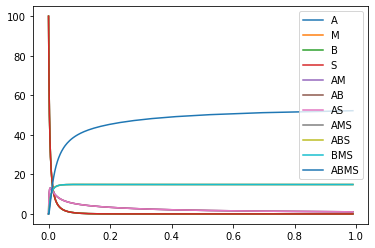

In [31]:
nodes_list = ['A','B','S','M','AB','BMS','ABS','AMS','ABMS','AM','AS']
#nodes_list = ['A','B','ABMS']
optim.plot_observable(0,nodes_list)


**After 750 optimization iterations**


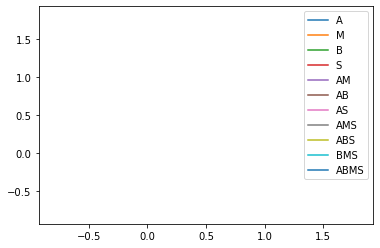

In [32]:
optim.plot_observable(-1,nodes_list)


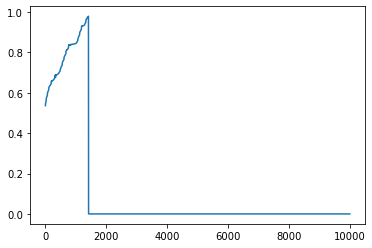

In [33]:
optim.plot_yield()

It seems like we've found a stable solution that produces greater yield than equilibrium. This should be thermodynamically
impossible. Let's try to find an explanation. We'll run simulations using the learned optimal parameters at a few different
timescales.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Using CPU
Using CPU
Using CPU
{'A': 0, 'M': 1, 'B': 2, 'S': 3, 'AM': 4, 'AB': 5, 'AS': 6, 'BM': 7, 'MS': 8, 'ABM': 9, 'AMS': 10, 'BS': 11, 'ABS': 12, 'BMS': 13, 'ABMS': 14}


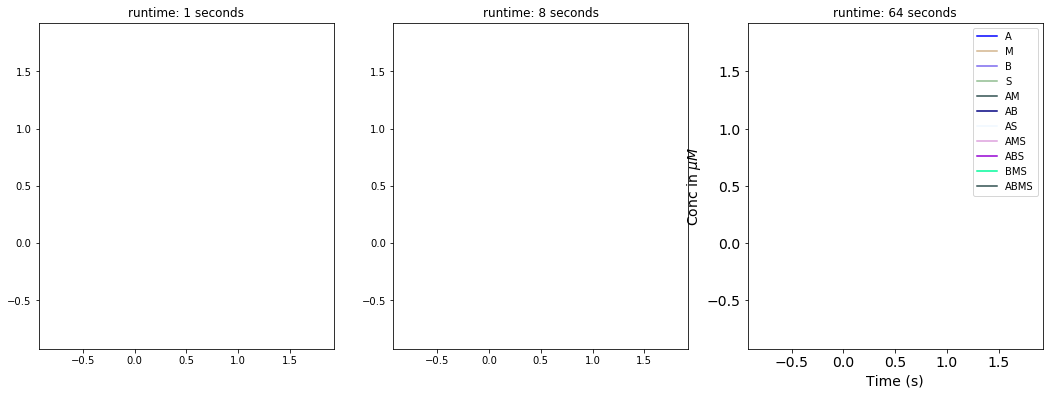

In [34]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 3)
optim_rn = optim.rn
for i, runtime in enumerate([1, 8, 64]):
    optim_rn.reset()
    sim = VecSim(optim_rn, runtime, device='cpu')
    y = sim.simulate()
    sim.plot_observable(nodes_list,ax=ax[i],)
    ax[i].set_title("runtime: " + str(runtime) + " seconds")
fig.set_size_inches(18, 6)
node_map = {}
for node in rn.network.nodes():
    node_map[gtostr(rn.network.nodes[node]['struct'])] = node

print(node_map)
plt.show()

In [ ]:
node_map = {}
for node in rn.network.nodes():
    node_map[gtostr(rn.network.nodes[node]['struct'])] = node

print(node_map)
def get_max_edge(n):
    """
    Calculates the max rate (k_on) for a given node
    To find out the maximum flow path to the final complex starting from the current node.
    
    Can also calculate the total rate of consumption of a node by summing up all rates. 
    Can tell which component is used quickly.
    """
    try:
        edges = rn.network.out_edges(n)
        #Loop over all edges
        #Get attributes
        kon_max = -1
        next_node = -1

        kon_sum = 0
        total_flux_outedges = 0
        total_flux_inedges = 0
        if len(edges)==0:
            return(False)
            
        for edge in edges:
            data = rn.network.get_edge_data(edge[0],edge[1])
            #print(data)
            #Get uid
            uid = data['uid']

            #Get updated kon
            temp_kon = vec_rn.kon[uid]
            kon_sum+=temp_kon
            
            if temp_kon > kon_max:
                kon_max = temp_kon
                next_node=edge[1]
             
        return(kon_max,next_node,kon_sum)
    except Exception as err:
        raise(err)

        
def get_node_flux(n):
    total_flux_outedges = 0
    total_flux_inedges = 0
    #Go over all the out edges
    edges_out = rn.network.out_edges(n)
    if len(edges_out)>0:

        for edge in edges_out:
            data = rn.network.get_edge_data(edge[0],edge[1])
            #print(data)
            #Get uid
            uid = data['uid']

            #Get updated kon
            temp_kon = vec_rn.kon[uid]

            #Calculate k_off also
            std_c = Tensor([1.])
            l_kon = torch.log(temp_kon)
            l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
            koff = torch.exp(l_koff)

            #Getting conc. of reactants and products
            #Get product
            prod = gtostr(rn.network.nodes[edge[1]]['struct']) 
            #Get other reactant
            react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))

            #Net flux from this edge = Generation - consumption
            edge_flux = koff*vec_rn.copies_vec[edge[1]] - temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])
            #edge_flux = koff*vec_rn.copies_vec[edge[1]] 

            print("Reaction: ", gtostr(rn.network.nodes[edge[0]]['struct']), "+",react," -> ",prod)
            print("Net flux: ",edge_flux)
            print("kon : ",temp_kon)
            print("koff: ",koff)
            print("Reaction data OUTWARD: ")
            print(data)

            total_flux_outedges+=edge_flux
    
    #Now go over all the in edges
    edges_in = rn.network.in_edges(n)
    react_list = []
    if len(edges_in) > 0:
        for edge in edges_in:
            if edge[0] in react_list:
                continue
            data = rn.network.get_edge_data(edge[0],edge[1])
            uid = data['uid']


            #Get generation rates; which would be kon
            temp_kon = vec_rn.kon[uid]

            #Get consumption rates; which is k_off
            std_c = Tensor([1.])
            l_kon = torch.log(temp_kon)
            l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
            koff = torch.exp(l_koff)

            #Get conc. of reactants and products
            prod = gtostr(rn.network.nodes[edge[1]]['struct'])
            #Get other reactant
            react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))
            react_list.append(node_map[react])
            #Net flux from this edge = Generation - consumption
            edge_flux_in = temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])- koff*vec_rn.copies_vec[edge[1]]
            #edge_flux_in = koff*vec_rn.copies_vec[edge[1]]
            


            print("Reaction: ", prod ," -> ",gtostr(rn.network.nodes[edge[0]]['struct']), "+",react)
            print("Net flux: ",edge_flux_in)
            print("kon : ",temp_kon)
            print("koff: ",koff)
            print("Raction data INWARD: ")
            print(data)

            total_flux_inedges+=edge_flux_in
    net_node_flux = total_flux_outedges + total_flux_inedges
    
    return(net_node_flux)
    
pathway = []
kon_sumarray = []
total_con_rate = {}
net_flux = {}
for n in rn.network.nodes():
    
    n_str = gtostr(rn.network.nodes[n]['struct']) 
    
    paths = [n_str]
    kon_sum = 0
    temp_node = n
    max_edge = True
    consumption_rate = 0
    if n < len(rn.network.nodes()):#num_monomers:
#         print("Current node: ")
#         print(n_str)
        while max_edge:
            max_edge = get_max_edge(temp_node)
            if max_edge:
                total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
                
                temp_node = max_edge[1]
                kon_sum += max_edge[0].item()
                
                
#                 print("Next node: ")
#                 print(temp_node)

                paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
            else:
                break
        pathway.append(paths)
        kon_sumarray.append(kon_sum)
        paths=[]
    print("-------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------")
    print("|                                                                             |")
    node_flux = get_node_flux(n)
    net_flux[gtostr(rn.network.nodes[n]['struct'])] = node_flux
    print("|                                                                             |")
    print("-------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------")

print(pathway)
print(kon_sumarray)

#print(total_con_rate)

In [ ]:
for k,v in sorted(net_flux.items(),key=lambda x : x[1]):
    print(k," : ", v)

print(vec_rn.copies_vec)
print(vec_rn.kon)

In [ ]:
print(solution)
poly_system = EquilibriumSolver(rn)
solution = poly_system.solve(init_val=vec_rn.copies_vec.detach().numpy().tolist())
#solution = poly_system.solve(verifyBool = False)
if solution == None:
    print("No Equilibrium solution")
else:
    print(solution)
    print("Equilibrium expected yield: ", 100 * solution[-1] / min(vec_rn.initial_copies[:vec_rn.num_monomers]), '%')
print(vec_rn.kon)

Clearly, the equilibrium reached by the system still matches the equilibrium solution. We have however found a set of parameters that can increase available complete AP2 at some point before equilibrium to levels significantly higher than at equilibrium. We don't observe any trapping, but have uncovered an interesting effect. 

Now we'll move on to looking at ARP23. This is 7 subunits, which drastically increases the number of possible reactions. Expect longer runtimes. 